## Deliverable 1

In [314]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl 
from math import ceil

from IPython.display import Image, display

## Reading the data

In [435]:
df_train = pd.read_csv('train.csv', index_col = "carID")
df_test = pd.read_csv('test.csv', index_col = "carID")

## Metadata

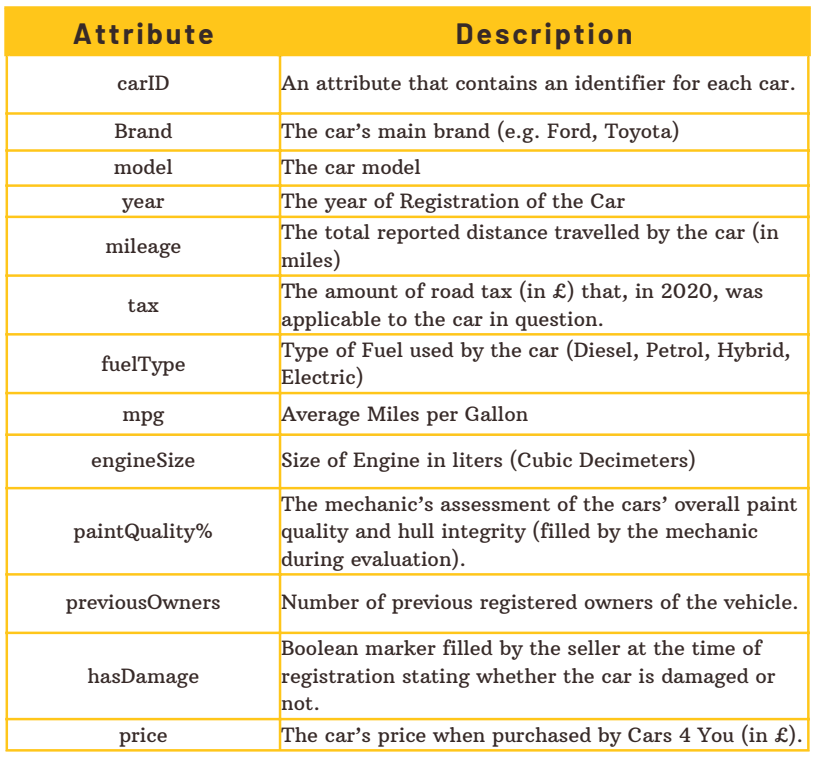

In [316]:
display(Image(filename="metadata.png", width=500))

## Characteristics of our data

In [317]:
list(df_train.columns)
#y=price
#x=others

['Brand',
 'model',
 'year',
 'price',
 'transmission',
 'mileage',
 'fuelType',
 'tax',
 'mpg',
 'engineSize',
 'paintQuality%',
 'previousOwners',
 'hasDamage']

In [318]:
df_train.head(20)

Brand       model    year  price transmission        mileage  \
carID                                                                    
69512        VW        Golf  2016.0  22290    Semi-Auto   28421.000000   
53000    Toyota       Yaris  2019.0  13790       Manual    4589.000000   
6366       Audi          Q2  2019.0  24990    Semi-Auto    3624.000000   
29021      Ford      FIESTA  2018.0  12500        anual    9102.000000   
10062       BMW    2 Series  2019.0  22995       Manual    1000.000000   
14704       BMW    3 Series  2014.0   8199        anual  101153.348285   
6924       Audi          A3  2017.0  16089       Manual   21396.000000   
50783     Skoda     Octavia  2017.0   7500       Manual  116750.000000   
67071        VW      Passat  2017.0  15999    Semi-Auto   30339.000000   
23348      Ford       Focus  2019.0  15300       Manual   10700.000000   
58447      Opel    Insignia  2018.0  11998       Manual   21123.000000   
46005  Mercedes      A Clas  2020.0  24109     Semi-Aut    1000.000000   
820        Audi          Q3  2017.0  17799    Automatic   26360.000000   
48622     Skoda       Fabia  2019.0  13295    Automatic   14378.000000   
65892        VW        Golf  2017.0  13990       Manual    9500.000000   
40257  Mercedes     A Class  2019.0  19491    Automatic    7057.000000   
18965      Ford         Ka+  2018.0   6990       Manual   15472.000000   
7969        BMW    3 Series  2017.0  19995    Semi-Auto    9981.000000   
20142       FOR       Focus  2017.0  18997       Manual   20112.000000   
38898  mercedes   GLC Class  2017.0  28995    Automatic   30808.000000   

      fuelType    tax        mpg  engineSize  paintQuality%  previousOwners  \
carID                                                                         
69512   Petrol    NaN  11.417268         2.0           63.0        4.000000   
53000   Petrol  145.0  47.900000         1.5           50.0        1.000000   
6366    Petrol  145.0  40.900000         1.5           56.0        4.000000   
29021   Petrol  145.0  65.700000         1.0           50.0       -2.340306   
10062   Petrol  145.0  42.800000         1.5           97.0        3.000000   
14704   Diesel   30.0  65.700000         2.0           74.0        0.000000   
6924    Petrol   20.0  60.100000         1.4           75.0        4.000000   
50783   Diesel  145.0  68.900000         1.6           59.0        4.000000   
67071   Diesel  150.0  62.800000         2.0           85.0        4.000000   
23348   Petrol  150.0  60.100000         1.0           35.0        1.000000   
58447   Diesel  145.0  65.700000         1.6           68.0        4.000000   
46005   Diesel  145.0  67.300000         1.5           45.0        1.000000   
820     Petrol  145.0  47.900000         1.4           30.0        4.000000   
48622    etrol  145.0  60.100000         NaN           59.0        1.000000   
65892   Petrol  150.0  54.300000         1.4           69.0        2.000000   
40257   Diesel  145.0  68.900000         1.5           74.0        3.000000   
18965    etrol  145.0  57.700000         1.2           53.0        4.000000   
7969    Diesel  150.0  62.800000         2.0           57.0        0.000000   
20142   Petrol    NaN        NaN         2.0           40.0        4.000000   
38898   Diesel  150.0  56.500000         NaN           60.0        1.000000   

       hasDamage  
carID             
69512        0.0  
53000        0.0  
6366         0.0  
29021        0.0  
10062        0.0  
14704        0.0  
6924         0.0  
50783        0.0  
67071        0.0  
23348        0.0  
58447        0.0  
46005        0.0  
820          0.0  
48622        0.0  
65892        0.0  
40257        0.0  
18965        0.0  
7969         0.0  
20142        0.0  
38898        0.0

In [319]:
df_test.head(20)

Brand          model         year transmission       mileage  \
carID                                                                     
89856    Hyundai            I30  2022.878006    Automatic  30700.000000   
106581        VW         Tiguan  2017.000000    Semi-Auto -48190.655673   
80886        BMW       2 Series  2016.000000    Automatic  36792.000000   
100174      Opel    Grandland X  2019.000000       Manual   5533.000000   
81376        BMW       1 Series  2019.000000    Semi-Auto   9058.000000   
85391       Ford         Fiesta  2018.000000       Manual  29626.000000   
82175        BMW             X1  2016.000000       Manual  57717.000000   
95250   Mercedes        B Class  2017.000000       Manual  14005.000000   
85071       Ford          Focus  2011.000000       Manual  68274.000000   
96210      Skoda         Superb  2019.000000       Manual  20632.000000   
80317        BMW       5 Series  2019.000000    Semi-Auto   9131.000000   
92731   Mercedes        C Class  2018.000000       unknow  20173.000000   
107704        VW             Up  2018.000000    Automatic   2154.000000   
98302      Toyot           Aygo  2017.000000       Manual  13255.000000   
107055        VW           Golf  2017.000000    Semi-Auto  20168.000000   
94621   Mercedes        C Class  2019.000000    Automatic    750.000000   
91709   Mercedes         M CLAS  2015.000000    Automatic  68279.000000   
98193     Toyota   Land Cruiser  2019.000000    Automatic   6836.000000   
76189       Audi             TT  2017.000000       Manual  30562.000000   
86871       Ford          Focus          NaN       Manual  10585.000000   

       fuelType    tax       mpg  engineSize  paintQuality%  previousOwners  \
carID                                                                         
89856    petrol  205.0  41.50000         1.6           61.0             3.0   
106581   Petrol  150.0  38.20000         2.0           60.0             2.0   
80886    Petrol  125.0  51.40000         1.5           94.0             2.0   
100174   Petrol  145.0  44.10000         1.2           77.0             1.0   
81376    Diesel  150.0  51.40000         2.0           45.0             4.0   
85391    Petrol  145.0  65.70000         1.0           64.0             1.0   
82175     Diese  125.0  58.90000         2.0           50.0             1.0   
95250    Diesel  145.0  65.70000         NaN           64.0             4.0   
85071    Petrol  145.0  47.90000         1.6           71.0             4.0   
96210    Diesel  145.0  64.20000         2.0           99.0             3.0   
80317    Diesel  145.0  62.80000         2.0           73.0             3.0   
92731    Diesel  145.0  61.40000         2.1           78.0             0.0   
107704   Petrol  145.0  94.78638         1.0           40.0             0.0   
98302    Petrol  145.0  69.00000         1.0           35.0             3.0   
107055   Petrol  200.0  39.80000         2.0           76.0             1.0   
94621    Petrol  150.0  30.40000         3.0           76.0             1.0   
91709    Diesel  300.0  39.20000         NaN           53.0             3.0   
98193    Diesel  145.0  30.10000         2.8           90.0             0.0   
76189    Diesel  145.0  62.80000         2.0            NaN             1.0   
86871    Petrol  145.0  57.70000         1.0           73.0             0.0   

        hasDamage  
carID              
89856         0.0  
106581        0.0  
80886         0.0  
100174        0.0  
81376         0.0  
85391         0.0  
82175         0.0  
95250         0.0  
85071         0.0  
96210         0.0  
80317         0.0  
92731         NaN  
107704        0.0  
98302         0.0  
107055        0.0  
94621         0.0  
91709         0.0  
98193         0.0  
76189         0.0  
86871         0.0

In [320]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75973 entries, 69512 to 15795
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           74452 non-null  object 
 1   model           74456 non-null  object 
 2   year            74482 non-null  float64
 3   price           75973 non-null  int64  
 4   transmission    74451 non-null  object 
 5   mileage         74510 non-null  float64
 6   fuelType        74462 non-null  object 
 7   tax             68069 non-null  float64
 8   mpg             68047 non-null  float64
 9   engineSize      74457 non-null  float64
 10  paintQuality%   74449 non-null  float64
 11  previousOwners  74423 non-null  float64
 12  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 8.1+ MB


In [321]:
df_train.describe(include='all')

Brand   model          year          price transmission  \
count   74452   74456  74482.000000   75973.000000        74451   
unique     72     735           NaN            NaN           40   
top      Ford   Focus           NaN            NaN       Manual   
freq    14808    6353           NaN            NaN        38050   
mean      NaN     NaN   2017.096611   16881.889553          NaN   
std       NaN     NaN      2.208704    9736.926322          NaN   
min       NaN     NaN   1970.000000     450.000000          NaN   
25%       NaN     NaN   2016.000000   10200.000000          NaN   
50%       NaN     NaN   2017.000000   14699.000000          NaN   
75%       NaN     NaN   2019.000000   20950.000000          NaN   
max       NaN     NaN   2024.121759  159999.000000          NaN   

              mileage fuelType           tax           mpg    engineSize  \
count    74510.000000    74462  68069.000000  68047.000000  74457.000000   
unique            NaN       34           NaN           NaN           NaN   
top               NaN   Petrol           NaN           NaN           NaN   
freq              NaN    37995           NaN           NaN           NaN   
mean     23004.184088      NaN    120.329078     55.152666      1.660136   
std      22129.788366      NaN     65.521176     16.497837      0.573462   
min     -58540.574478      NaN    -91.121630    -43.421768     -0.103493   
25%       7423.250000      NaN    125.000000     46.300000      1.200000   
50%      17300.000000      NaN    145.000000     54.300000      1.600000   
75%      32427.500000      NaN    145.000000     62.800000      2.000000   
max     323000.000000      NaN    580.000000    470.800000      6.600000   

        paintQuality%  previousOwners  hasDamage  
count    74449.000000    74423.000000    74425.0  
unique            NaN             NaN        NaN  
top               NaN             NaN        NaN  
freq              NaN             NaN        NaN  
mean        64.590667        1.994580        0.0  
std         21.021065        1.472981        0.0  
min          1.638913       -2.345650        0.0  
25%         47.000000        1.000000        0.0  
50%         65.000000        2.000000        0.0  
75%         82.000000        3.000000        0.0  
max        125.594308        6.258371        0.0

In [322]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32567 entries, 89856 to 99627
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           31918 non-null  object 
 1   model           31917 non-null  object 
 2   year            31914 non-null  float64
 3   transmission    31944 non-null  object 
 4   mileage         31878 non-null  float64
 5   fuelType        31911 non-null  object 
 6   tax             29259 non-null  float64
 7   mpg             29279 non-null  float64
 8   engineSize      31939 non-null  float64
 9   paintQuality%   31942 non-null  float64
 10  previousOwners  31970 non-null  float64
 11  hasDamage       31970 non-null  float64
dtypes: float64(8), object(4)
memory usage: 3.2+ MB


In [323]:
df_test.describe(include='all')

Brand   model          year transmission        mileage fuelType  \
count   31918   31917  31914.000000        31944   31878.000000    31911   
unique     64     593           NaN           38            NaN       29   
top      Ford   Focus           NaN       Manual            NaN   Petrol   
freq     6360    2721           NaN        16312            NaN    16113   
mean      NaN     NaN   2017.102299          NaN   22952.658921      NaN   
std       NaN     NaN      2.207969          NaN   22132.758713      NaN   
min       NaN     NaN   1991.000000          NaN  -58540.574478      NaN   
25%       NaN     NaN   2016.000000          NaN    7298.250000      NaN   
50%       NaN     NaN   2017.000000          NaN   17225.500000      NaN   
75%       NaN     NaN   2019.000000          NaN   32500.000000      NaN   
max       NaN     NaN   2024.121759          NaN  279000.000000      NaN   

                 tax           mpg    engineSize  paintQuality%  \
count   29259.000000  29279.000000  31939.000000   31942.000000   
unique           NaN           NaN           NaN            NaN   
top              NaN           NaN           NaN            NaN   
freq             NaN           NaN           NaN            NaN   
mean      120.569239     55.210728      1.665377      64.446667   
std        65.560570     17.644635      0.574467      21.142188   
min       -91.121630    -43.421768     -0.103493       1.638913   
25%       125.000000     46.300000      1.200000      47.000000   
50%       145.000000     54.300000      1.600000      65.000000   
75%       145.000000     62.800000      2.000000      82.000000   
max       580.000000    470.800000      6.600000     125.594308   

        previousOwners  hasDamage  
count     31970.000000    31970.0  
unique             NaN        NaN  
top                NaN        NaN  
freq               NaN        NaN  
mean          2.006118        0.0  
std           1.472310        0.0  
min          -2.345650        0.0  
25%           1.000000        0.0  
50%           2.000000        0.0  
75%           3.000000        0.0  
max           6.258371        0.0

## Duplicates

Check duplicates:

In [324]:
df_train.reset_index().duplicated().sum() #reset_index() to consider the index

np.int64(0)

In [325]:
df_test.reset_index().duplicated().sum() #reset_index() to consider the index

np.int64(0)

Check duplicates in carId:

In [326]:
df_train.shape

(75973, 13)

In [327]:
df_test.shape

(32567, 12)

In [328]:
print(f'Train: {len(set(df_train.index))}\nTest: {len(set(df_test.index))}')

Train: 75973
Test: 32567


In [329]:
#There are also no duplicates in carId!!

## Unique Values- Categorical Variables

There is clearly a problem with the categories of every categorical variable.

### *Brands*

In [436]:
brands = list(set(df_train['Brand'].dropna().unique()).union(set(df_test['Brand'].dropna().unique())))
print(f' Typos in brands: {brands}')

 Typos in brands: ['mw', 'ercedes', 'BM', 'MW', 'MERCEDES', 'OPE', 'opel', 'PEL', 'yundai', 'mercede', 'FOR', 'TOYOT', 'Ope', 'yunda', 'hyundai', 'mercedes', 'for', 'Hyunda', 'BMW', 'pel', 'audi', 'Skoda', 'ORD', 'Aud', 'Toyota', 'ord', 'KODA', 'OYOTA', 'udi', 'koda', 'AUD', 'bmw', 'Skod', 'HYUNDAI', 'VW', 'FORD', 'Toyot', 'TOYOTA', 'SKOD', 'kod', 'toyota', 'skod', 'aud', 'AUDI', 'oyota', 'ford', 'vw', 'ERCEDES', 'bm', 'Opel', 'v', 'Hyundai', 'SKODA', 'Ford', 'Mercede', 'Audi', 'w', 'ope', 'YUNDAI', 'skoda', 'MERCEDE', 'oyot', 'W', 'or', 'HYUNDA', 'hyunda', 'Mercedes', 'For', 'V', 'OPEL', 'ercede', 'UDI', 'M', 'pe', 'ud', 'toyot']


TheFuzz uses the Levenshtein edit distance to calculate the degree of closeness between two strings.

**Levenshtein distance** = at a minimum, how many edits are required to change one string into the other.

[https://www.datacamp.com/tutorial/fuzzy-string-python]

In [437]:
set([len(brand) for brand in brands])

{1, 2, 3, 4, 5, 6, 7, 8}

[https://stackoverflow.com/questions/31806695/when-to-use-which-fuzz-function-to-compare-2-strings]

[https://medium.com/@laxmi17sarki/string-matching-using-fuzzywuzzy-24be9e85c88d]

**Ratio choice**: fuzz.WRatio, most robust method

In [438]:
from fuzzywuzzy import fuzz

# Creates clusters with similar brands
def create_clusters(brand_list, min_cluster_size, threshold=86): #groups strings with a similarity greater than or equal to treshold%. 
    clusters = []
    for brand in brand_list:
        found = False
        for cluster in clusters:
            # evaluates if brand is similar to any cluster
            if any(fuzz.WRatio(str(brand).lower(), str(b).lower()) >= threshold for b in cluster):
                cluster.append(brand)
                found = True
                break
        #if it doesn't find a match --> new cluster
        if not found:
            clusters.append([brand])

    #The creation of clusters depends on the order in which the brands appear, so we need to check that the brands are in the correct cluster:
    #reassign elements from really small clusters!!
    for cluster in clusters[:]: #iterate over a copy so we can change the original without breaking the loop
        if len(cluster) >= min_cluster_size:
            continue
        for brand in cluster[:]:  #iterate over a copy so we can change the original without breaking the loop
            reassigned = False
            for other_cluster in clusters:
                if other_cluster == cluster:
                    continue
                if any(fuzz.WRatio(str(brand).lower(), str(b).lower()) >= threshold for b in other_cluster):
                    other_cluster.append(brand)
                    cluster.remove(brand)
                    reassigned = True
                    break
    clusters = [c for c in clusters if c] #remove empty clusters
    
    return clusters

clusters = create_clusters(brands, min_cluster_size=3)

# Gives the clusters names- chooses the most freq name!
brand_mapping = {}
brand_counts = df_train['Brand'].value_counts()
for cluster in clusters:
    mode = max(cluster, key=lambda x: brand_counts.get(x,0))  #finds the "max" in the cluster according to the key --> mode
    for brand in cluster:
        brand_mapping[brand] = str(mode)

df_train['Brand_cleaned'] = df_train['Brand'].map(brand_mapping)
df_test['Brand_cleaned'] = df_test['Brand'].map(brand_mapping)

print("Clusters:")
for c in clusters:
    print(c)

print("\nCleaned brand - Train:")
print(df_train['Brand_cleaned'].dropna().unique())

print("\nCleaned brand - Test:")
print(df_test['Brand_cleaned'].dropna().unique())

Clusters:
['mw', 'MW', 'BMW', 'bmw', 'bm', 'w', 'W', 'M', 'BM']
['ercedes', 'MERCEDES', 'mercede', 'mercedes', 'ERCEDES', 'Mercede', 'MERCEDE', 'Mercedes', 'ercede']
['OPE', 'opel', 'PEL', 'Ope', 'pel', 'Opel', 'ope', 'OPEL', 'pe']
['yundai', 'yunda', 'hyundai', 'Hyunda', 'HYUNDAI', 'Hyundai', 'YUNDAI', 'HYUNDA', 'hyunda']
['FOR', 'for', 'FORD', 'ford', 'Ford', 'or', 'For', 'ORD', 'ord']
['TOYOT', 'Toyota', 'OYOTA', 'Toyot', 'TOYOTA', 'toyota', 'oyota', 'oyot', 'toyot']
['audi', 'Aud', 'udi', 'AUD', 'aud', 'AUDI', 'Audi', 'UDI', 'ud']
['Skoda', 'KODA', 'koda', 'Skod', 'SKOD', 'kod', 'skod', 'SKODA', 'skoda']
['VW', 'vw', 'v', 'V']

Cleaned brand - Train:
['VW' 'Toyota' 'Audi' 'Ford' 'BMW' 'Skoda' 'Opel' 'Mercedes' 'Hyundai']

Cleaned brand - Test:
['Hyundai' 'VW' 'BMW' 'Opel' 'Ford' 'Mercedes' 'Skoda' 'Toyota' 'Audi']


<div class="alert alert-block alert-danger">

### Os W's deviam ser volskwagens (VW). Corrigimos à mão?

</div>

### *Models*

In [439]:
# Pre processing the data set to be easier to find clusters:
    #remove spaces (at the beginning and end) and lowercase all letters
df_train['model'] = df_train['model'].where(df_train['model'].isna(), df_train['model'].astype(str).str.strip().str.lower()) #does not replace NaN's
df_test['model']  = df_test['model'].where(df_test['model'].isna(), df_test['model'].astype(str).str.strip().str.lower())

In [440]:
models=list(set(df_train['model'].dropna().unique()).union(set(df_test['model'].dropna().unique())))
print(f'Nº of unique values: {len(models)}')

Nº of unique values: 309


In [441]:
set([len(str(model)) for model in models])

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 21}

In [470]:
# Creates clusters with similar models
clusters = create_clusters(models, min_cluster_size=0, threshold=86)

# Gives the clusters names- chooses the mode!
model_mapping = {}
model_counts = df_train['model'].value_counts()
for cluster in clusters:
    mode = max(cluster, key=lambda x: model_counts.get(x,0)) 
    for model in cluster:
        model_mapping[model] = str(mode)

df_train['model_cleaned'] = df_train['model'].map(model_mapping)
df_test['model_cleaned'] = df_test['model'].map(model_mapping)

print("Clusters:")
for c in clusters:
    print(c)

print("\nCleaned model - Train:")
print(df_train['model_cleaned'].dropna().unique())

print("\nCleaned model - Test:")
print(df_test['model_cleaned'].dropna().unique())

Clusters:
['arteo', 't', 'octavia', 't-roc', 'accent', 'citigo', 'ecosport', 'fiesta', 'tt', 'yeti', 'antara', 'mustang', 't-ro', 'jetta', 'gtc', 'tigua', 'arteon', 'tiguan allspac', 'yeti outdoor', 'a', 'b clas', 'a3', 'a5', 'galaxy', 'a2', 'puma', 'camr', 'shuttle', 'gla clas', 'amica', 'zafir', 'fiest', 'roomste', 'x-clas', 'vectra', 'galax', 'karo', 'a8', 'cla clas', 'rav4', 'pum', 'terracan', 'zafira toure', 'tigra', 'insignia', 'a4', 'tiguan', 'cc', 'z', 'zafira', 'rapi', 'kami', 'santa f', 'gl clas', 'beetle', 'toura', 'sl clas', 'meriva', 'yaris', 'agila', 'fabia', 'glb class', 'caravell', 'crossland x', 'karoq', 'm clas', 'touareg', 'supra', 'a7', 'shara', 'kuga', 'passat', 'm class', 'veloste', 'ranger', 'gls clas', 'a class', 'grandland x', 'cl class', 'ayg', 'astra', 'tucso', 'tiguan allspace', 'm', 'm4', 'meriv', 'u', 'm6', 'x-class']
['ioni', 'i', 'ioniq', 'octavi', 'rapid', '4 series', 'citig', 'auris', '2 serie', 'iq', '2 series', '8 serie', '6 serie', 'avensis', 'hilu'

<div class="alert alert-block alert-danger">

# Still not working: try again

There are models that are not assigned to any of the listed brands!! 

</div>

### *Fuel Types*

In [443]:
fuel_types=list(set(df_train['fuelType'].dropna().unique()).union(set(df_test['fuelType'].dropna().unique())))
print(f' Typos in models: {fuel_types}')

 Typos in models: ['Petrol', 'PETROL', 'YBRID', 'Other', 'hybrid', 'ETROL', 'HYBRI', 'ther', 'Hybri', 'IESE', 'iese', 'etro', 'other', 'Diesel', 'Petro', 'ybri', 'iesel', 'OTHER', 'PETRO', 'IESEL', 'diese', 'Othe', 'petrol', 'Electric', 'hybri', 'petro', 'ybrid', 'DIESE', 'Diese', 'Hybrid', 'etrol', 'HYBRID', 'diesel', 'DIESEL', 'ETRO']


In [444]:
# Creates clusters with similar fuel types
clusters = create_clusters(fuel_types, min_cluster_size=2, threshold=86)

# Gives the clusters names- chooses the mode!
fuel_mapping = {}
fuel_counts = df_train['fuelType'].value_counts()
for cluster in clusters:
    mode = max(cluster, key=lambda x: fuel_counts.get(x,0)) 
    for fuel in cluster:
        fuel_mapping[fuel] = str(mode)

df_train['fuelType_cleaned'] = df_train['fuelType'].map(fuel_mapping)
df_test['fuelType_cleaned'] = df_test['fuelType'].map(fuel_mapping)

print("Clusters:")
for c in clusters:
    print(c)

print("\nCleaned fuel type - Train:")
print(df_train['fuelType_cleaned'].dropna().unique())

print("\nCleaned fuel type - Test:")
print(df_test['fuelType_cleaned'].dropna().unique())

Clusters:
['Petrol', 'PETROL', 'ETROL', 'etro', 'Petro', 'PETRO', 'petrol', 'petro', 'etrol', 'ETRO']
['YBRID', 'hybrid', 'HYBRI', 'Hybri', 'ybri', 'hybri', 'ybrid', 'Hybrid', 'HYBRID']
['Other', 'ther', 'other', 'OTHER', 'Othe']
['IESE', 'iese', 'Diesel', 'iesel', 'IESEL', 'diese', 'DIESE', 'Diese', 'diesel', 'DIESEL']
['Electric']

Cleaned fuel type - Train:
['Petrol' 'Diesel' 'Hybrid' 'Other' 'Electric']

Cleaned fuel type - Test:
['Petrol' 'Diesel' 'Hybrid' 'Other' 'Electric']


### *Transmission*

In [445]:
transmission_types = list(set(df_train['transmission'].dropna().unique()).union(set(df_test['transmission'].dropna().unique())))
print(f' Typos in models: {transmission_types}')

 Typos in models: ['Automati', 'automati', 'Semi-Auto', 'unknown', 'emi-Aut', 'emi-Auto', 'semi-aut', 'SEMI-AUTO', 'unknow', 'emi-auto', 'AUTOMATI', 'anua', 'SEMI-AUT', 'manual ', 'automatic', 'MANUAL', 'Other', 'Manual', 'ANUAL', ' manual ', 'MANUA', 'semi-auto', ' Manual', 'Manua', 'nknown', 'utomati', 'Semi-Aut', 'manual', 'Automatic', 'manua', 'AUTOMATIC', 'Manual ', 'anual', 'nknow', ' Manual ', 'UNKNOWN', 'UTOMATIC', 'utomatic', 'EMI-AUTO', ' MANUAL ']


In [446]:
# Creates clusters with similar fuel types
clusters = create_clusters(transmission_types, min_cluster_size=2, threshold=86)

# Gives the clusters names- chooses the mode!
trans_mapping = {}
trans_counts = df_train['transmission'].value_counts()
for cluster in clusters:
    mode = max(cluster, key=lambda x: trans_counts.get(x,0)) 
    for trans in cluster:
        trans_mapping[trans] = str(mode)

df_train['transmission_cleaned'] = df_train['transmission'].map(trans_mapping)
df_test['transmission_cleaned'] = df_test['transmission'].map(trans_mapping)

print("Clusters:")
for c in clusters:
    print(c)

print("\nCleaned transmission - Train:")
print(df_train['transmission_cleaned'].dropna().unique())

print("\nCleaned transmission - Test:")
print(df_test['transmission_cleaned'].dropna().unique())

Clusters:
['Automati', 'automati', 'AUTOMATI', 'automatic', 'utomati', 'Automatic', 'AUTOMATIC', 'UTOMATIC', 'utomatic']
['Semi-Auto', 'emi-Aut', 'emi-Auto', 'semi-aut', 'SEMI-AUTO', 'emi-auto', 'SEMI-AUT', 'semi-auto', 'Semi-Aut', 'EMI-AUTO']
['unknown', 'unknow', 'nknown', 'nknow', 'UNKNOWN']
['anua', 'manual ', 'MANUAL', 'Manual', 'ANUAL', ' manual ', 'MANUA', ' Manual', 'Manua', 'manual', 'manua', 'Manual ', 'anual', ' Manual ', ' MANUAL ']
['Other']

Cleaned transmission - Train:
['Semi-Auto' 'Manual' 'Automatic' 'unknown' 'Other']

Cleaned transmission - Test:
['Automatic' 'Semi-Auto' 'Manual' 'unknown' 'Other']


## Numeric Variables- Values

In [343]:
#Check the range of the variables
df_train.describe()

year          price        mileage           tax           mpg  \
count  74482.000000   75973.000000   74510.000000  68069.000000  68047.000000   
mean    2017.096611   16881.889553   23004.184088    120.329078     55.152666   
std        2.208704    9736.926322   22129.788366     65.521176     16.497837   
min     1970.000000     450.000000  -58540.574478    -91.121630    -43.421768   
25%     2016.000000   10200.000000    7423.250000    125.000000     46.300000   
50%     2017.000000   14699.000000   17300.000000    145.000000     54.300000   
75%     2019.000000   20950.000000   32427.500000    145.000000     62.800000   
max     2024.121759  159999.000000  323000.000000    580.000000    470.800000   

         engineSize  paintQuality%  previousOwners  hasDamage  
count  74457.000000   74449.000000    74423.000000    74425.0  
mean       1.660136      64.590667        1.994580        0.0  
std        0.573462      21.021065        1.472981        0.0  
min       -0.103493       1.638913       -2.345650        0.0  
25%        1.200000      47.000000        1.000000        0.0  
50%        1.600000      65.000000        2.000000        0.0  
75%        2.000000      82.000000        3.000000        0.0  
max        6.600000     125.594308        6.258371        0.0

### *hasDamage*

In [449]:
print(f'Train:\n% of NaNs in hasDamage: {round(df_train['hasDamage'].isna().sum() / df_train.shape[0], 5)}\n% of 0s in hasDamage: {round(df_train[df_train['hasDamage']==0].shape[0] / df_train.shape[0], 5)}\n% of 1s in hasDamage: {round(df_train[df_train['hasDamage']==1].shape[0] / df_train.shape[0], 5)}\n')

Train:
% of NaNs in hasDamage: 0.02038
% of 0s in hasDamage: 0.97962
% of 1s in hasDamage: 0.0



In [450]:
print(f'Test:\n% of NaNs in hasDamage: {round(df_test['hasDamage'].isna().sum() / df_test.shape[0], 5)}\n% of 0s in hasDamage: {round(df_test[df_test['hasDamage']==0].shape[0] / df_test.shape[0], 5)}\n% of 1s in hasDamage: {round(df_test[df_test['hasDamage']==1].shape[0] / df_test.shape[0], 5)}\n')

Test:
% of NaNs in hasDamage: 0.01833
% of 0s in hasDamage: 0.98167
% of 1s in hasDamage: 0.0



NaNs will be treated as a new category.

##### Let's analyze the zeros vs. the NaNs to see if the NaNs are associated with damaged or undamaged cars.:


In [451]:
cols = ['Brand_cleaned','model','fuelType_cleaned','transmission_cleaned', 'year']
distinctive_cols = [ 'price', 'mileage', 'tax', 'paintQuality%', 'hasDamage']

df_train_temp = df_train.dropna(subset=cols) [cols + distinctive_cols] 
                                            #selectes the rows with no NaN's in cols + distinctive_cols 
df_train_temp = df_train_temp [ df_train_temp.duplicated(subset=cols, keep=False) ].sort_values(cols) 
                                            #saves the filtered duplicates
groups_filtered = df_train_temp.groupby(cols).filter(lambda group: group['hasDamage'].eq(0).any() and group['hasDamage'].isna().any())
                                            #groups the rows by cols
                                            #.filter: function applied to the groups created by groupby
                                            #saves the group if there is at least one obs with 0 damamge and another with nan damage
group_dict = {name: group for name, group in groups_filtered.groupby(cols)} #saves 

*Note*: groups_filtered.groupby(cols) is a GroupBy object. Saves the name (brand, model, etc.) of the group and the observations in each group.

In [452]:
print(f"Number of groups: {len(group_dict)}")

Number of groups: 737


Randomly select some groups and analyze them: 

In [412]:
import random

def analyze_random_group(group_dict, distinctive_cols):
    #Selects a random key and separates the group in 0's and nan's
    key = random.choice(list(group_dict.keys()))
    group = group_dict[key]
    zeros = group[group['hasDamage'] == 0]
    nans = group[group['hasDamage'].isna()]
    
    print(f"\nSelected group: {key}")
    print(f"\nNumber of 0's: {len(zeros)}\nNumber of NaNs: {len(nans)}")
    print("\nAverages- zeros:")
    print(zeros[distinctive_cols].mean())
    print("\nAverages- NaNs:")
    print(nans[distinctive_cols].mean())
    dif = (zeros[distinctive_cols].mean() - nans[distinctive_cols].mean())
    print("\nDif between 0's and NaN's (zeros-nan's):")
    print(dif)

for i in range(5):
    analyze_random_group(group_dict, distinctive_cols)


Selected group: ('BMW', '4 series', 'Diesel', 'Semi-Auto', np.float64(2020.0))

Number of 0's: 25
Number of NaNs: 3

Averages- zeros:
price            32962.16000
mileage            562.64000
tax                146.20000
paintQuality%       58.26087
hasDamage            0.00000
dtype: float64

Averages- NaNs:
price            30059.333333
mileage             42.333333
tax                145.000000
paintQuality%       48.500000
hasDamage                 NaN
dtype: float64

Dif between 0's and NaN's (zeros-nan's):
price            2902.826667
mileage           520.306667
tax                 1.200000
paintQuality%       9.760870
hasDamage                NaN
dtype: float64

Selected group: ('Audi', 'q3', 'Petrol', 'Semi-Auto', np.float64(2017.0))

Number of 0's: 50
Number of NaNs: 4

Averages- zeros:
price            21417.960000
mileage          21042.346939
tax                147.244898
paintQuality%       61.142857
hasDamage            0.000000
dtype: float64

Averages- NaNs:
price    

**('BMW', '4 series', 'Diesel', 'Semi-Auto', np.float64(2020.0)):**

- NaN's are cheaper (3 000 dif) and the paint quality is inferior, but they have lower mileage, although the difference is not absurd (2000 dif).
- Indicative that the NaNs may be damaged cars.

**('Audi', 'q3', 'Petrol', 'Semi-Auto', np.float64(2017.0)):**

- NaN's are cheaper (3 000 dif) and have more mileage.
- The paint quality of NaN's is slightly superior.
- Could still be damaged cars.

**('BMW', 'x6', 'Diesel', 'Automatic', np.float64(2013.0)):**

- NaN's are cheaper (2 500 dif) and have lower mileage (in this case, both categories have high mileage, so this is probably not relevant).
- The paint quality of NaN's is much lower (48% dif).
- Indicative that the NaNs may be damaged cars.

**('Opel', 'astr', 'Petrol', 'Manual', np.float64(2016.0)):**

- NaN's are cheaper (3 800 dif) and have higher mileage (50 000 dif).
- The paint quality of NaN's is lower.
- Indicative that, in this case, the NaNs are very used cars, instead of damaged cars.

**('BMW', '7 series', 'Diesel', 'Semi-Auto', np.float64(2020.0)):**

- NaN's are cheaper (2 300 dif) and have more mileage (in this case, both categories have low mileage, so this is probably not relevant).
- The paint quality of NaN's is lower.
- Indicative that the NaNs may be damaged cars.

<div class="alert alert-block alert-danger">

We decided NaN's will be **damaged cars?**. Now lets correct the data type of the variable:

</div>

In [453]:
#Correct data type:
df_train['hasDamage'] = df_train ['hasDamage'].astype(bool)
df_train[df_train['hasDamage'].isna()] ['hasDamage'] = True
df_test['hasDamage'] = df_test ['hasDamage'].astype(bool)
df_test[df_test['hasDamage'].isna()] ['hasDamage'] = True

In [454]:
#Check data type:
df_train.hasDamage.dtype

dtype('bool')

### *previousOwners*

In [455]:
print(f'% of observations with negative owners:\nTrain:{round(df_train[df_train['previousOwners']<0].shape[0] / df_train.shape[0], 5)}\nTest:{round(df_test[df_test['previousOwners']<0].shape[0] / df_test.shape[0], 5)}')
print(f'\n% of observations with 0 owners:\nTrain:{round(df_train[df_train['previousOwners']==0].shape[0] / df_train.shape[0], 5)}\nTest:{round(df_test[df_test['previousOwners']==0].shape[0] / df_test.shape[0], 5)}')

% of observations with negative owners:
Train:0.00488
Test:0.00516

% of observations with 0 owners:
Train:0.19585
Test:0.19099


Invalid observations - Positives vs Negatives: 

In [471]:
neg_owners = df_train[df_train['previousOwners']<0]
pos_owners = df_train[df_train['previousOwners']>0]

In [472]:
neg_owners.describe().T

count          mean           std           min           25%  \
year            365.0   2017.272792      1.959356   2010.000000   2016.000000   
price           371.0  17242.967655  10419.807024   2995.000000  10150.000000   
mileage         363.0  22200.886192  23329.752145 -52618.457894   6445.000000   
tax             337.0    116.049518     69.207858    -60.684095     30.000000   
mpg             330.0     55.153422     14.746699      9.429179     45.775000   
engineSize      361.0      1.654256      0.581510      0.186425      1.200000   
paintQuality%   363.0     65.397022     20.416042      3.115295     49.000000   
previousOwners  371.0     -2.332039      0.015070     -2.345650     -2.340306   
OwnerStatus     371.0      0.000000      0.000000      0.000000      0.000000   

                        50%           75%            max  
year             2017.00000   2019.000000    2023.267989  
price           14700.00000  20962.500000   97500.000000  
mileage         15238.00000  34813.500000  134000.000000  
tax               145.00000    145.000000     580.000000  
mpg                54.30000     62.800000     188.300000  
engineSize          1.50000      2.000000       5.500000  
paintQuality%      66.00000     81.000000     125.003773  
previousOwners     -2.33936     -2.335123      -2.299439  
OwnerStatus         0.00000      0.000000       0.000000

In [473]:
pos_owners.describe().T

count          mean           std           min       25%  \
year            58006.0   2017.093886      2.212870   1970.000000   2016.00   
price           59173.0  16890.075372   9766.221577    450.000000  10200.00   
mileage         58060.0  23080.048653  22209.873297 -58540.574478   7474.25   
tax             52981.0    120.498638     65.762650    -91.121630    125.00   
mpg             52973.0     55.092059     16.361899    -43.421768     46.30   
engineSize      58000.0      1.661439      0.571968     -0.103493      1.20   
paintQuality%   58005.0     64.539750     21.022999      1.638913     47.00   
previousOwners  59173.0      2.523242      1.153959      1.000000      2.00   
OwnerStatus     59173.0      1.000000      0.000000      1.000000      1.00   

                    50%       75%            max  
year             2017.0   2019.00    2024.121759  
price           14699.0  20950.00  159999.000000  
mileage         17360.0  32489.25  323000.000000  
tax               145.0    145.00     580.000000  
mpg                54.3     62.80     470.800000  
engineSize          1.6      2.00       6.600000  
paintQuality%      65.0     82.00     125.594308  
previousOwners      3.0      4.00       6.258371  
OwnerStatus         1.0      1.00       1.000000

Comparing the positives with the negatives:

##### Visualization

In [500]:
df_train['OwnerStatus'] = np.where(df_train['previousOwners'] > 0, 1, 0)
    #1 if previousOwners>0 , 0 if previousOwners<=0

In [501]:
categorical_features = ['Brand_cleaned', 'model','fuelType_cleaned', 'transmission_cleaned', 'hasDamage']
not_used=['Brand', 'transmission', 'fuelType', 'model_cleaned', 'previousOwners', 'OwnerStatus']
numeric_features = df_train.columns.drop(categorical_features + not_used)
numeric_features

Index(['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%',
       'PaintQualityStatus'],
      dtype='object')

<Figure size 700x400 with 0 Axes>

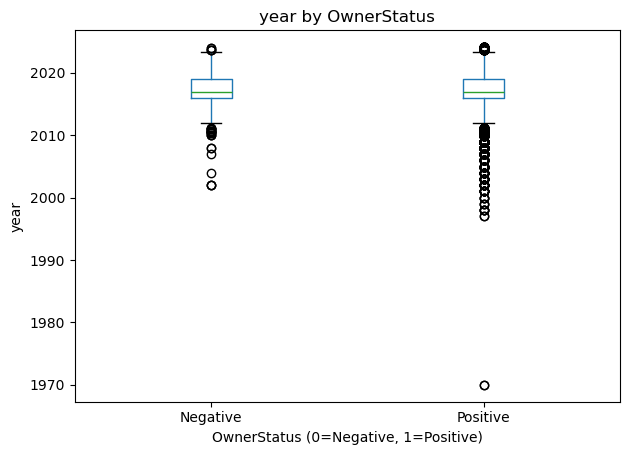

<Figure size 700x400 with 0 Axes>

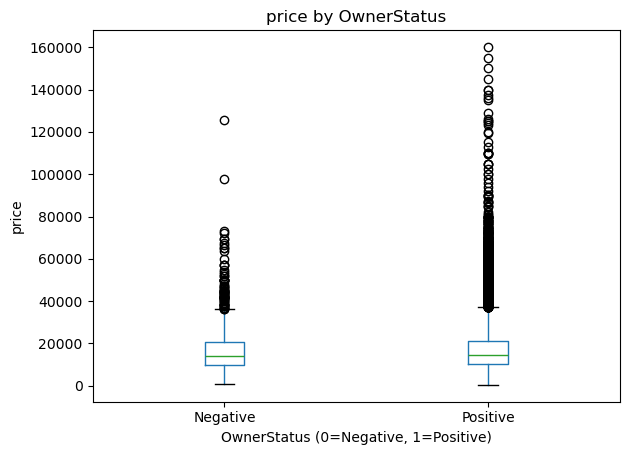

<Figure size 700x400 with 0 Axes>

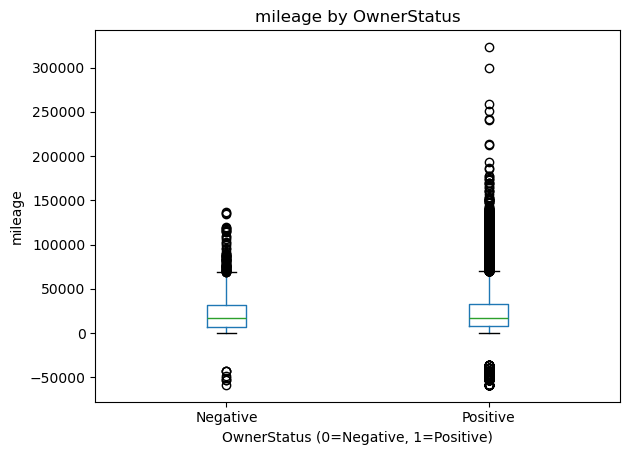

<Figure size 700x400 with 0 Axes>

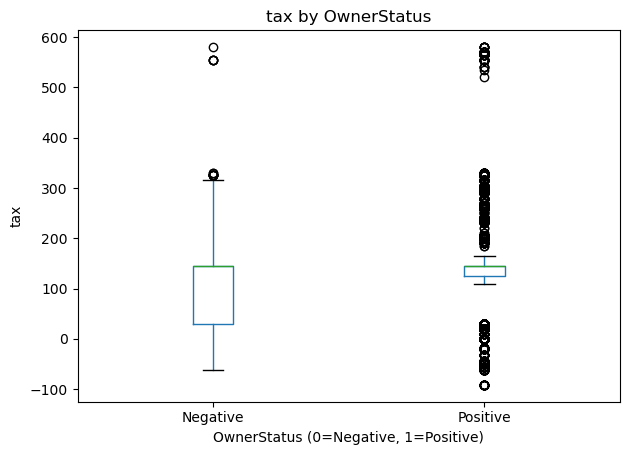

<Figure size 700x400 with 0 Axes>

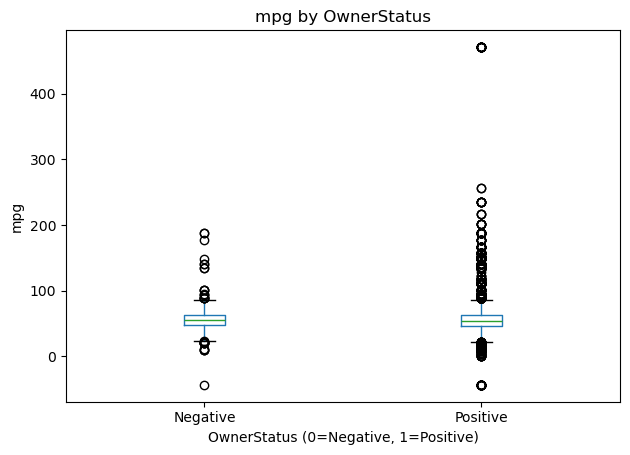

<Figure size 700x400 with 0 Axes>

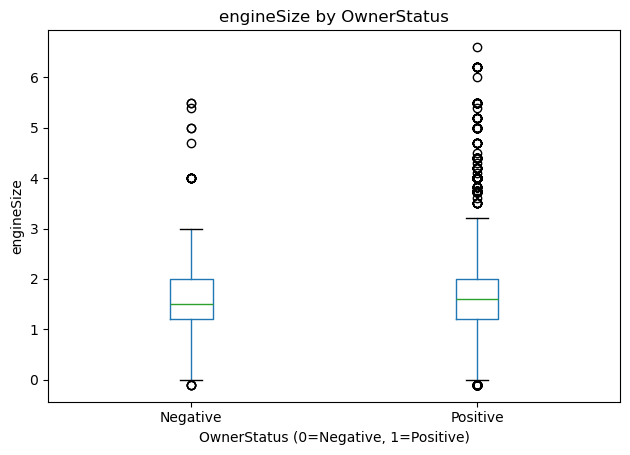

<Figure size 700x400 with 0 Axes>

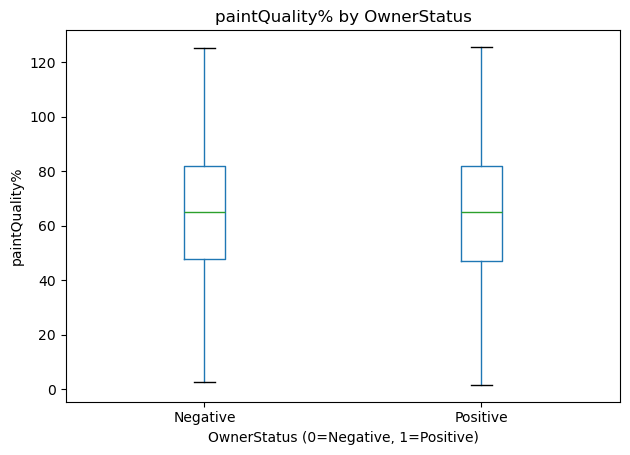

<Figure size 700x400 with 0 Axes>

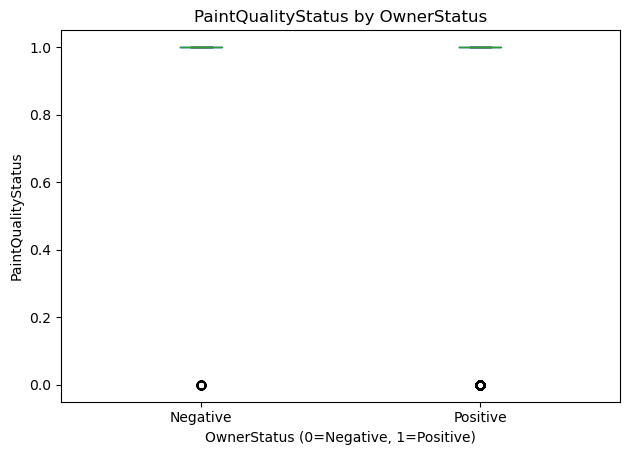

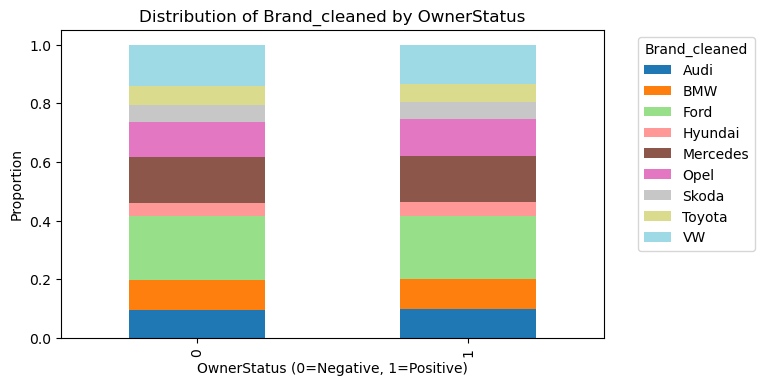

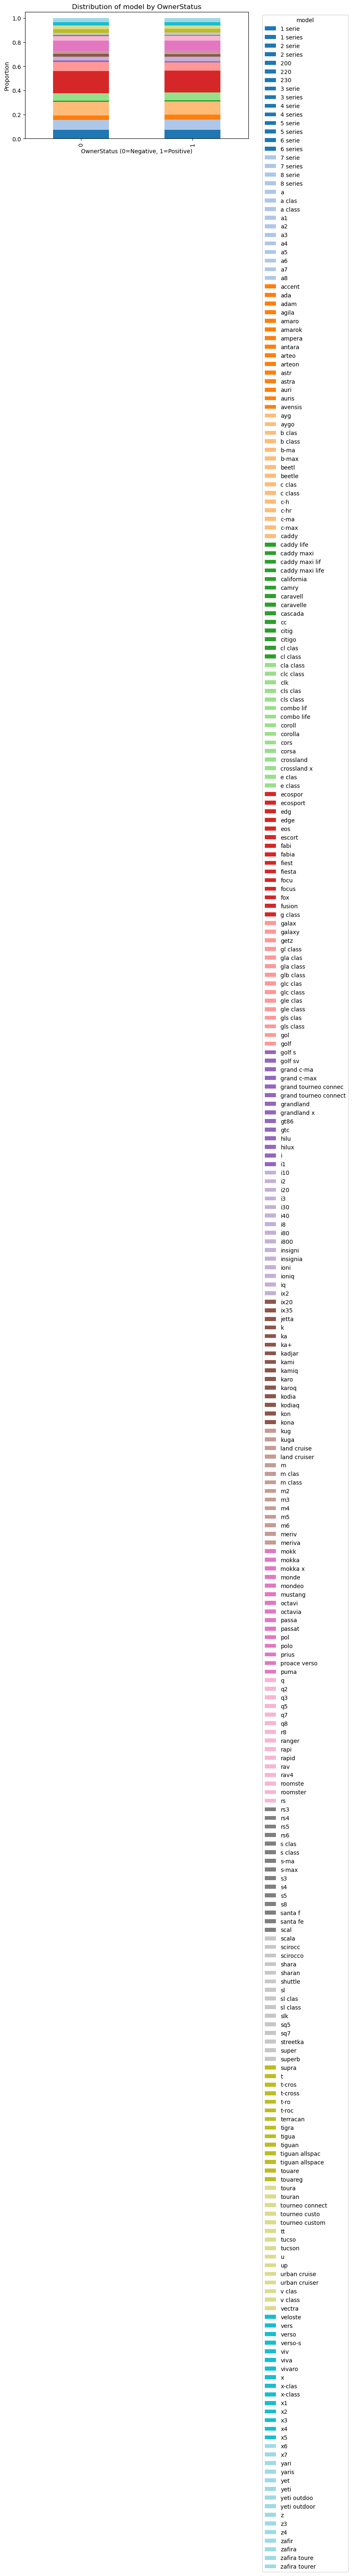

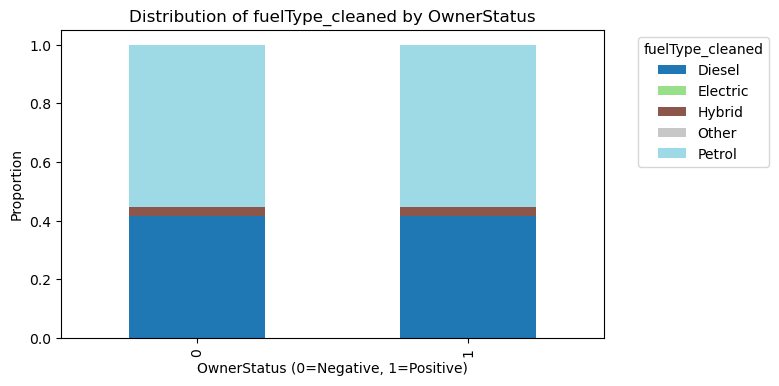

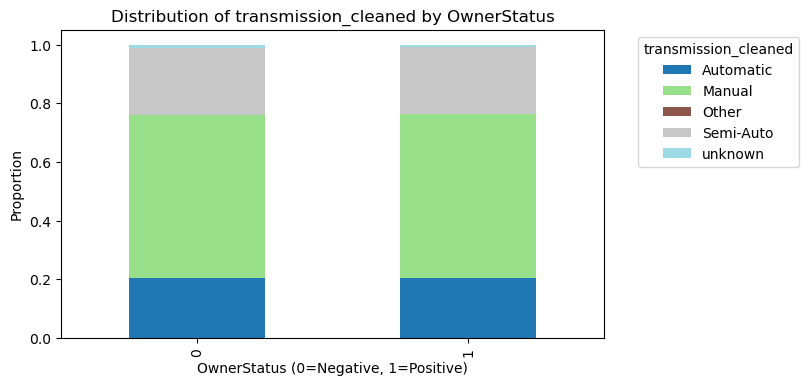

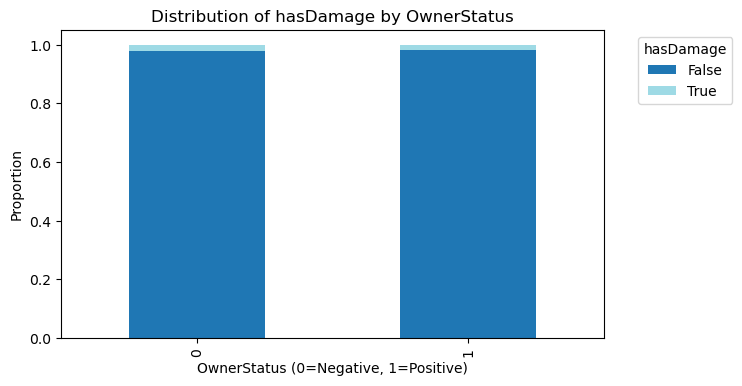

In [502]:
df_train_temp = df_train[df_train['previousOwners']!=0]

#Numeric Variables
for col in numeric_features:
    if col not in df_train.columns:
        continue
    plt.figure(figsize=(7, 4))
    df_train_temp.boxplot(column=col, by='OwnerStatus', grid=False)
    plt.title(f"{col} by OwnerStatus")
    plt.suptitle("")
    plt.xlabel("OwnerStatus (0=Negative, 1=Positive)")
    plt.ylabel(col)
    plt.xticks([1, 2], ['Negative', 'Positive'])
    plt.tight_layout()
    plt.show()

#Categorical Variables
for col in categorical_features:
    if col not in df_train.columns:
        continue
    plt.figure(figsize=(7, 4))
    pd.crosstab(df_train['OwnerStatus'], df_train[col], normalize='index').plot(
        kind='bar', stacked=True, ax=plt.gca(), colormap='tab20'
    )
    plt.title(f"Distribution of {col} by OwnerStatus")
    plt.xlabel("OwnerStatus (0=Negative, 1=Positive)")
    plt.ylabel("Proportion")
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.show()

df_train.drop('OwnerStatus', axis=1, inplace=True)

<div class="alert alert-block alert-danger">

Negatives and positives exhibit similar behavior in almost all features, except for tax and engine size, where the difference is quite significant.

Therefore, the population of positives and negatives cannot be equated.

We will treat *negatives* and *zeros* as NaNs. 

</div>

### *paintQuality%*

In [476]:
print(f'% of observations outside of a meaningful range: {round(df_train[df_train['paintQuality%']>100].shape[0] / df_train.shape[0], 5)}')

% of observations outside of a meaningful range: 0.00483


In [480]:
df_train [df_train ['paintQuality%']>100] ['paintQuality%'].unique()

array([125.10995148, 125.5694986 , 125.59430832, 125.4535988 ,
       125.30194543, 125.20203342, 125.18872876, 125.36650692,
       125.00377307])

##### Visualization

In [484]:
df_train['PaintQualityStatus'] = np.where(df_train['paintQuality%'] <= 100, 1, 0)
    #1 if paintQuality%<=100 , 0 if paintQuality%>100

In [518]:
categorical_features = ['Brand_cleaned', 'model','fuelType_cleaned', 'transmission_cleaned', 'hasDamage']
not_used=['Brand', 'transmission', 'fuelType', 'model_cleaned', 'paintQuality%', 'PaintQualityStatus']
numeric_features = df_train.columns.drop(categorical_features + not_used)

<Figure size 700x400 with 0 Axes>

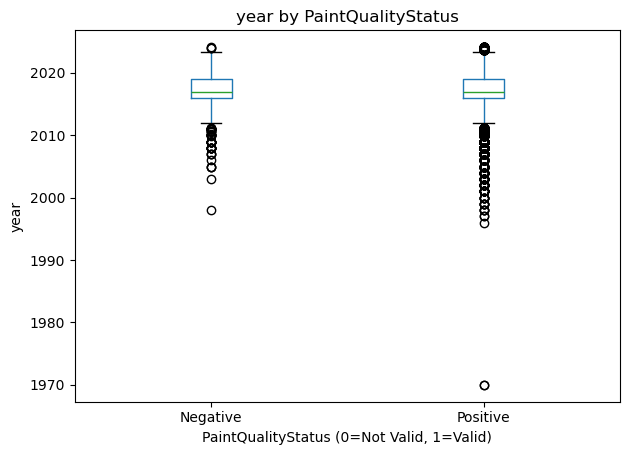

<Figure size 700x400 with 0 Axes>

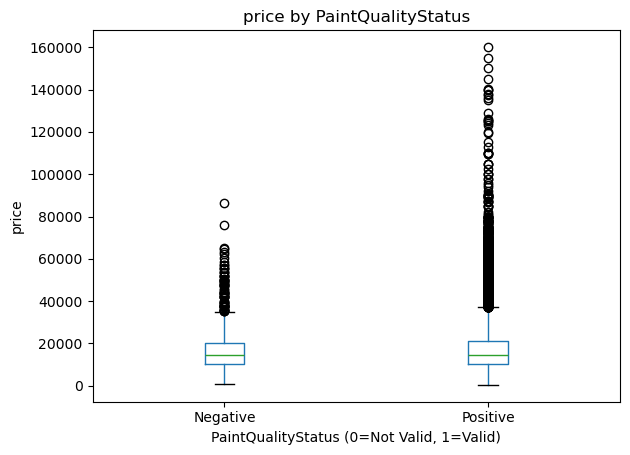

<Figure size 700x400 with 0 Axes>

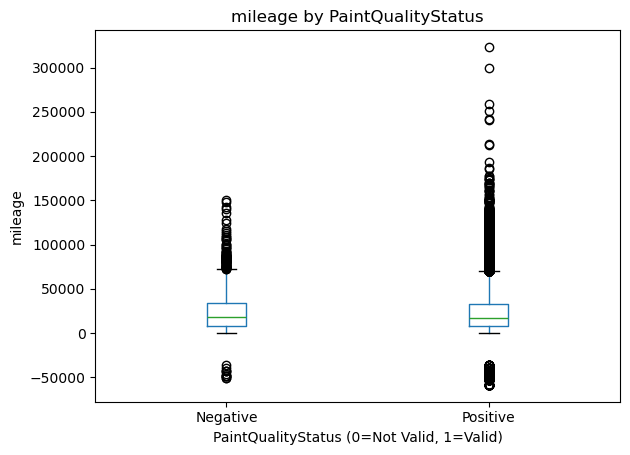

<Figure size 700x400 with 0 Axes>

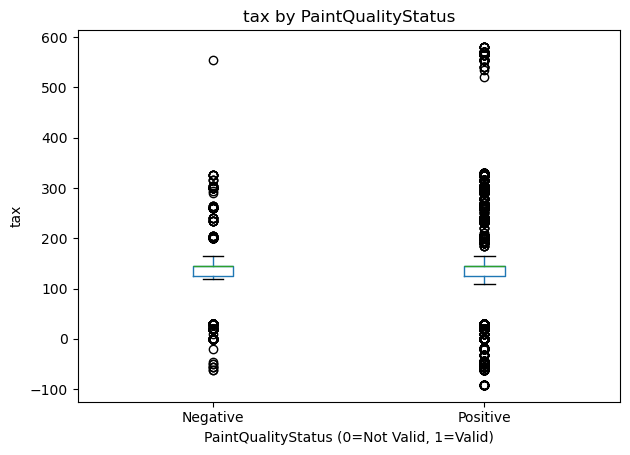

<Figure size 700x400 with 0 Axes>

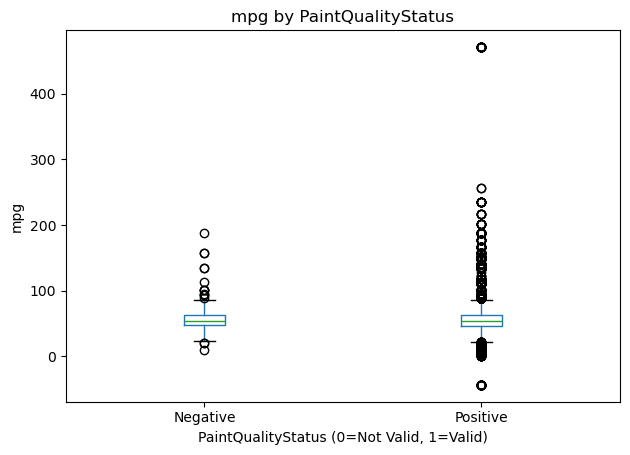

<Figure size 700x400 with 0 Axes>

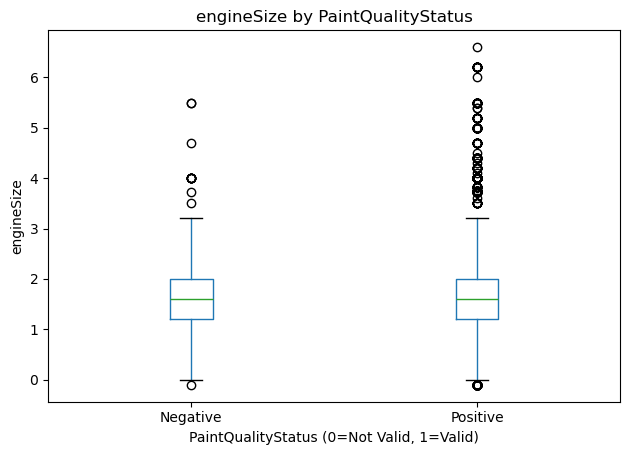

<Figure size 700x400 with 0 Axes>

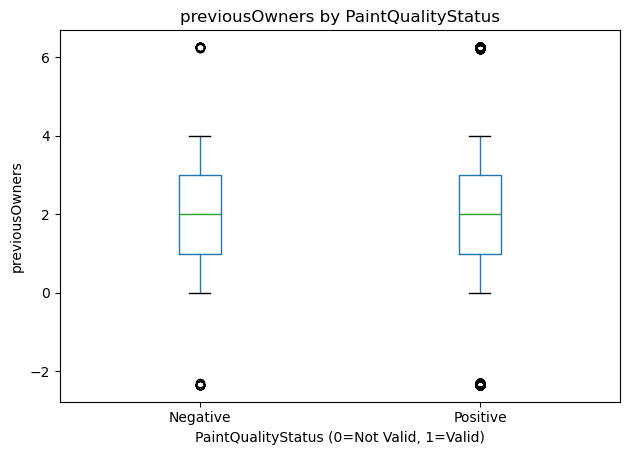

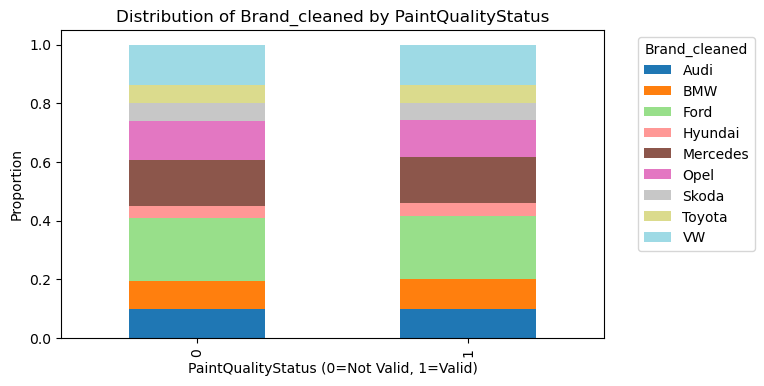

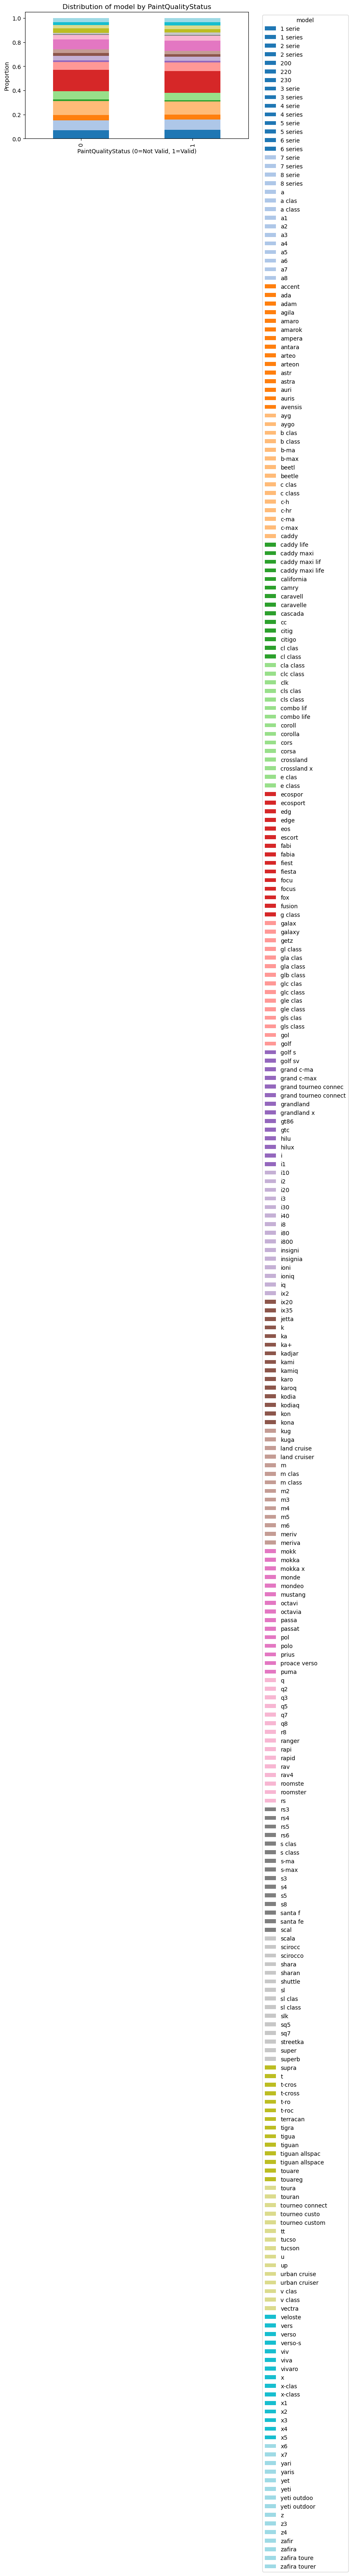

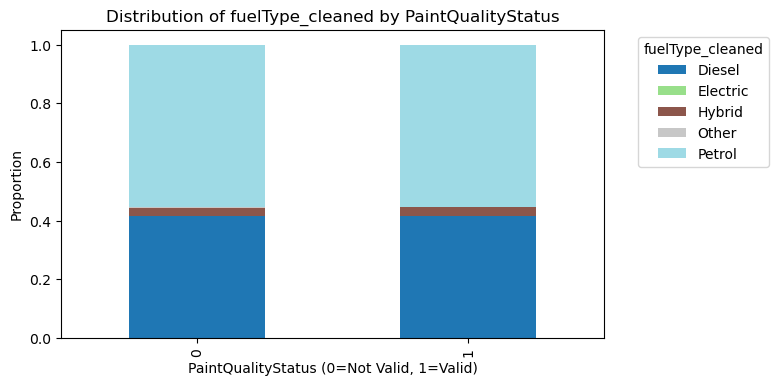

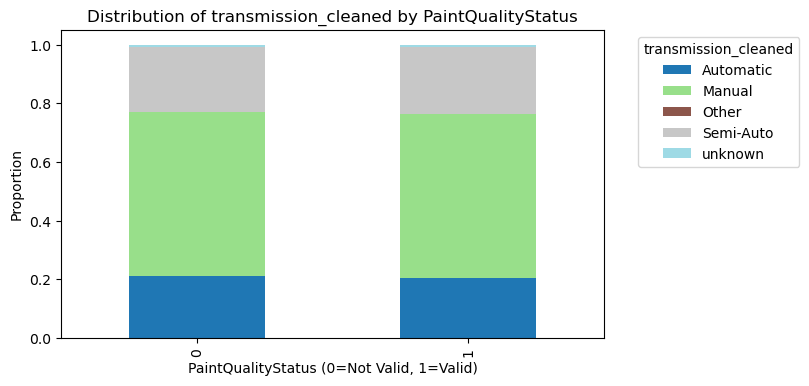

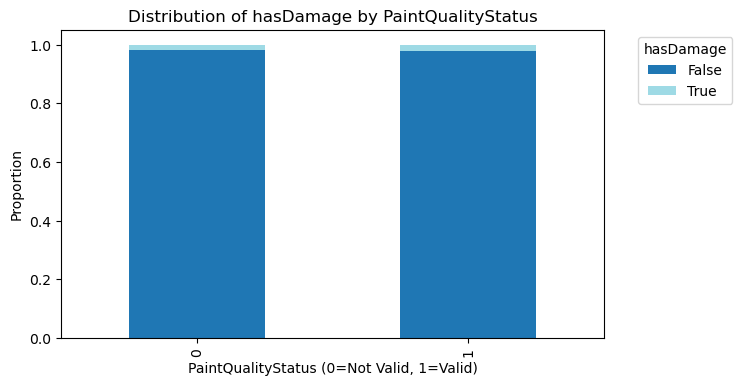

In [495]:
#Numeric Variables
for col in numeric_features:
    if col not in df_train.columns:
        continue
    plt.figure(figsize=(7, 4))
    df_train.boxplot(column=col, by='PaintQualityStatus', grid=False)
    plt.title(f"{col} by PaintQualityStatus")
    plt.suptitle("")
    plt.xlabel("PaintQualityStatus (0=Not Valid, 1=Valid)")
    plt.ylabel(col)
    plt.xticks([1, 2], ['Negative', 'Positive'])
    plt.tight_layout()
    plt.show()

#Categorical Variables
for col in categorical_features:
    if col not in df_train.columns:
        continue
    plt.figure(figsize=(7, 4))
    pd.crosstab(df_train['PaintQualityStatus'], df_train[col], normalize='index').plot(
        kind='bar', stacked=True, ax=plt.gca(), colormap='tab20'
    )
    plt.title(f"Distribution of {col} by PaintQualityStatus")
    plt.xlabel("PaintQualityStatus (0=Not Valid, 1=Valid)")
    plt.ylabel("Proportion")
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.show()

Looking at the box plots and histograms, there is no apparent reason for these invalid observations.

##### Let us analyze these observations in more detail: 

In [503]:
#Average paint quality by brand
df_train.groupby('Brand_cleaned')['paintQuality%'].mean().sort_values(ascending=False)

Brand_cleaned
BMW         64.793543
Audi        64.730707
Mercedes    64.719921
Hyundai     64.684452
Skoda       64.606944
Ford        64.602409
Opel        64.481495
Toyota      64.465460
VW          64.253123
Name: paintQuality%, dtype: float64

No brand stands out.

In [510]:
#Already seen in the histogram, but just to confirm.
print('Of the invalid observations, how many are in each brand (in %):\n')
print(df_train[df_train['PaintQualityStatus'] == 0]['Brand_cleaned'].value_counts(normalize=True).sort_values(ascending=False))
print('\nOf the valid observations, how many are in each brand (in %):\n')
print(df_train[df_train['PaintQualityStatus'] == 1]['Brand_cleaned'].value_counts(normalize=True).sort_values(ascending=False))

Of the invalid observations, how many are in each brand (in %):

Brand_cleaned
Ford        0.213053
Mercedes    0.155879
VW          0.137540
Opel        0.132686
Audi        0.098706
BMW         0.095469
Toyota      0.062567
Skoda       0.060410
Hyundai     0.043689
Name: proportion, dtype: float64

Of the valid observations, how many are in each brand (in %):

Brand_cleaned
Ford        0.215819
Mercedes    0.156823
VW          0.136670
Opel        0.125430
BMW         0.102248
Audi        0.098377
Toyota      0.062068
Skoda       0.057729
Hyundai     0.044836
Name: proportion, dtype: float64


We confirm the distribution is very similar. 

Let's compare the Ford group in both data sets:

<Figure size 700x400 with 0 Axes>

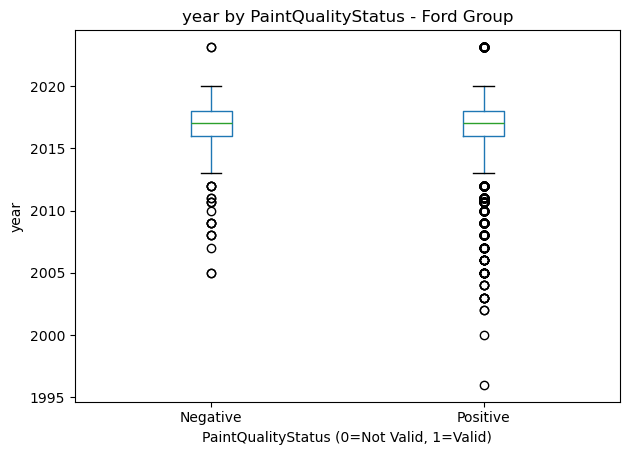

<Figure size 700x400 with 0 Axes>

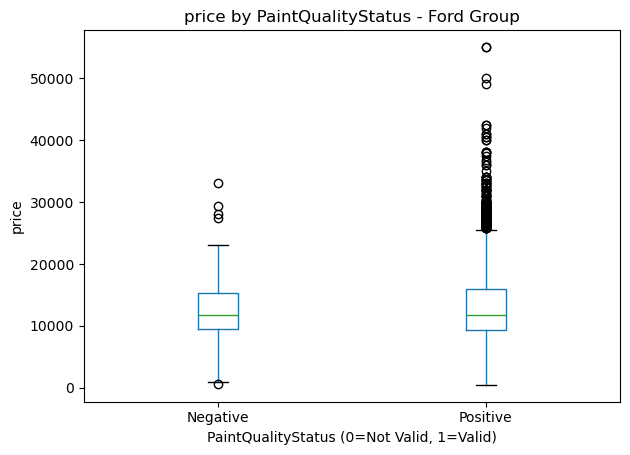

<Figure size 700x400 with 0 Axes>

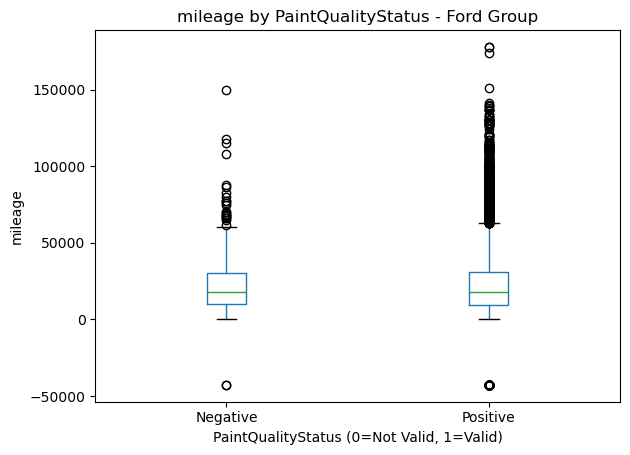

<Figure size 700x400 with 0 Axes>

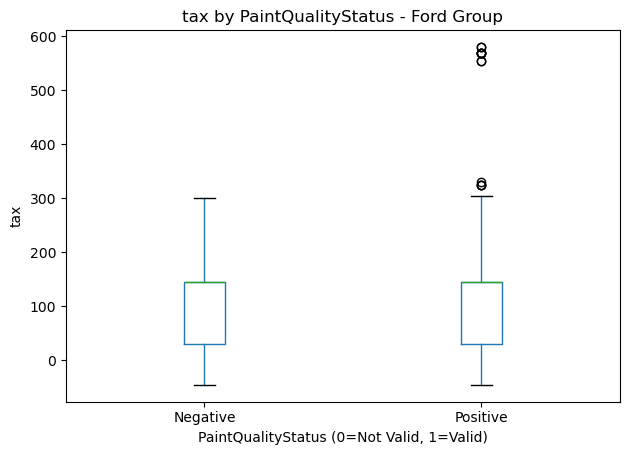

<Figure size 700x400 with 0 Axes>

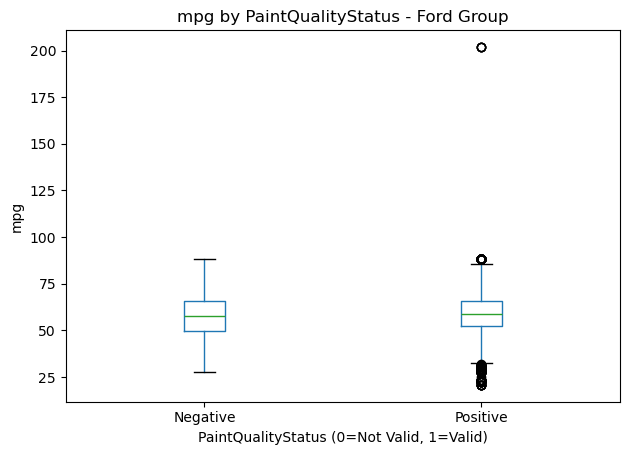

<Figure size 700x400 with 0 Axes>

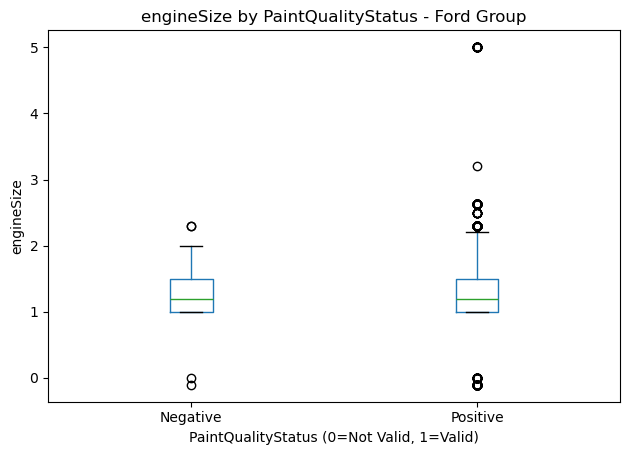

<Figure size 700x400 with 0 Axes>

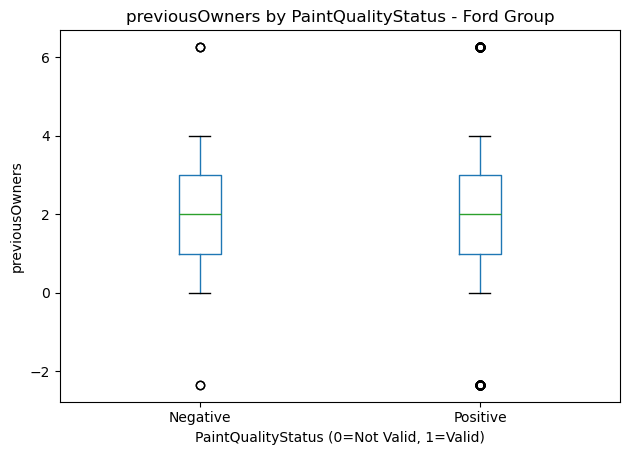

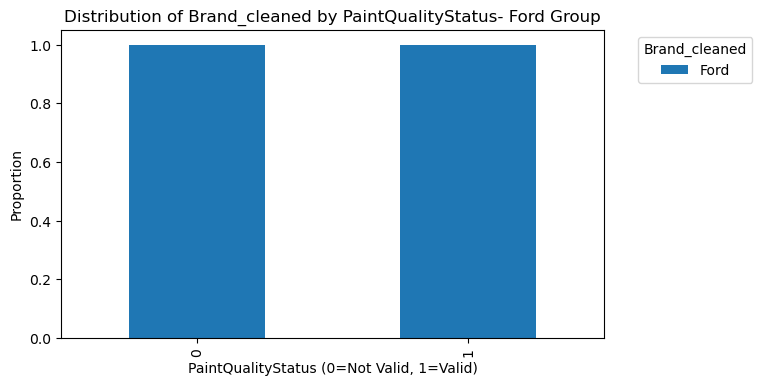

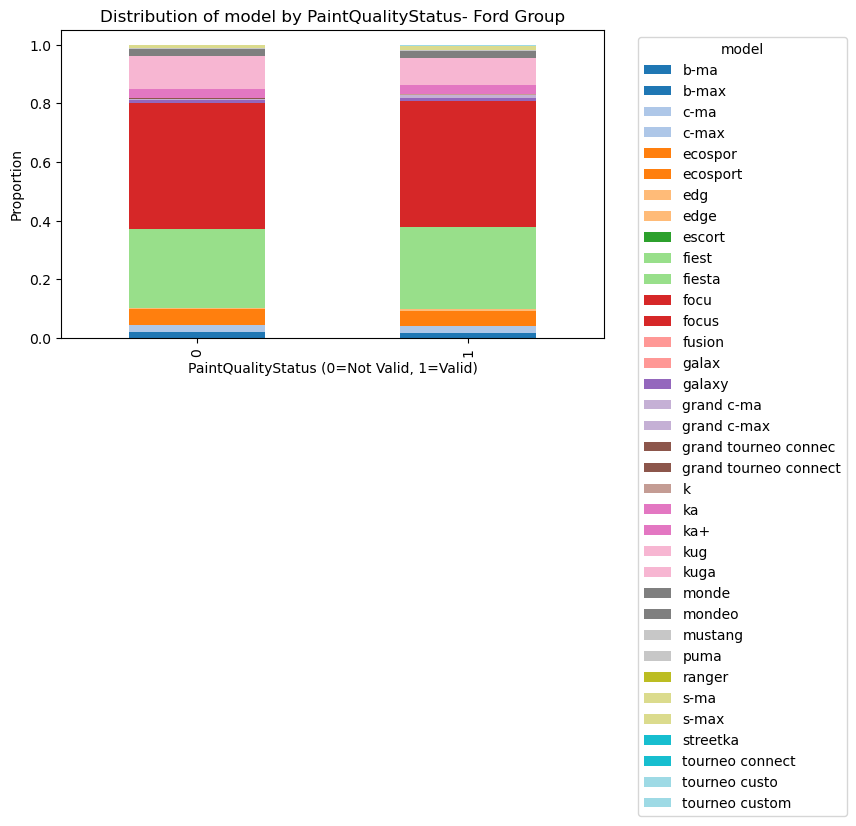

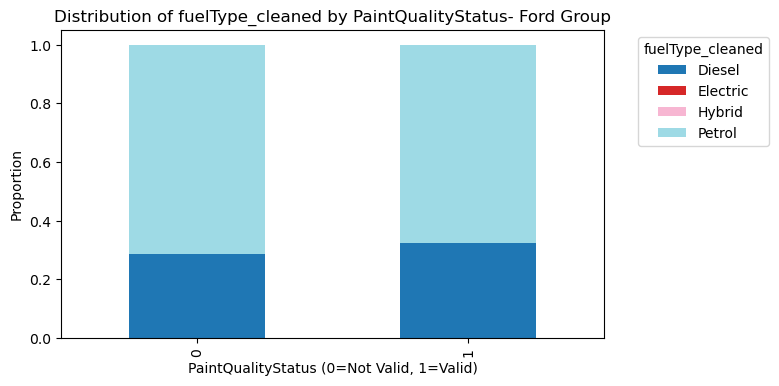

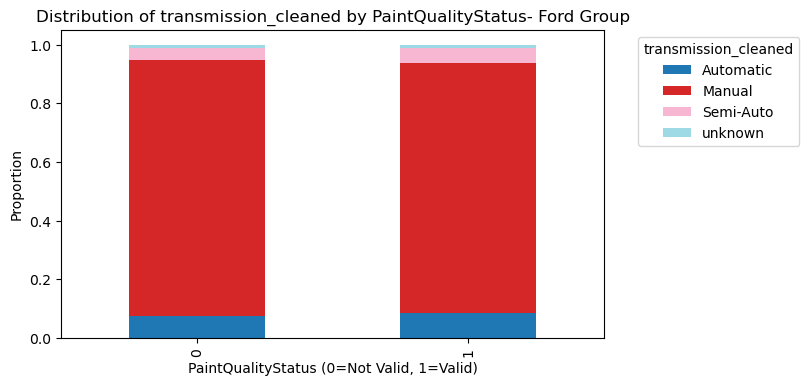

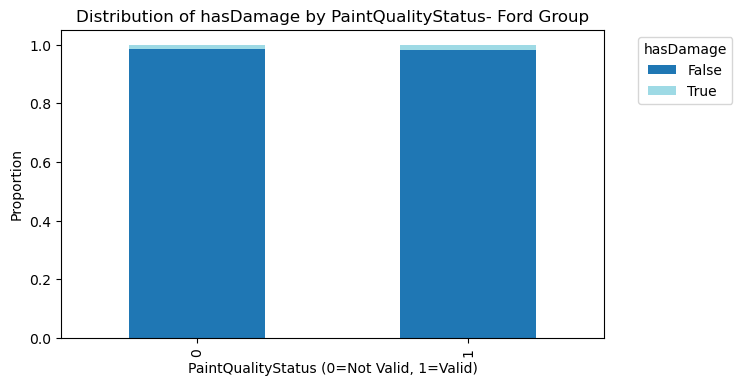

In [519]:
df_train_temp = df_train[df_train['Brand_cleaned']=='Ford']

#Numeric Variables
for col in numeric_features:
    if col not in df_train_temp.columns:
        continue
    plt.figure(figsize=(7, 4))
    df_train_temp.boxplot(column=col, by='PaintQualityStatus', grid=False)
    plt.title(f"{col} by PaintQualityStatus - Ford Group")
    plt.suptitle("")
    plt.xlabel("PaintQualityStatus (0=Not Valid, 1=Valid)")
    plt.ylabel(col)
    plt.xticks([1, 2], ['Negative', 'Positive'])
    plt.tight_layout()
    plt.show()

#Categorical Variables
for col in categorical_features:
    if col not in df_train_temp.columns:
        continue
    plt.figure(figsize=(7, 4))
    pd.crosstab(df_train_temp['PaintQualityStatus'], df_train_temp[col], normalize='index').plot(
        kind='bar', stacked=True, ax=plt.gca(), colormap='tab20'
    )
    plt.title(f"Distribution of {col} by PaintQualityStatus- Ford Group")
    plt.xlabel("PaintQualityStatus (0=Not Valid, 1=Valid)")
    plt.ylabel("Proportion")
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.show()

In [520]:
df_train.drop('PaintQualityStatus', axis=1, inplace=True)

<div class="alert alert-block alert-danger">

I would consider the invalid observations as NaN's. 

</div>

### *engineSize*

In [524]:
print(f'% of negative sizes: {round(df_train[df_train['engineSize']<0].shape[0] / df_train.shape[0], 5)}')
print(f'% of size 0: {round(df_train[df_train['engineSize']==0].shape[0] / df_train.shape[0], 5)}')

% of negative sizes: 0.00111
% of size 0: 0.00237


Comparing the positives with the negatives:

##### Visualization

In [530]:
df_train['EngineSizeStatus'] = np.where(df_train['engineSize'] >= 0, 1, 0)
    #1 if valid , 0 if invalid

In [531]:
categorical_features = ['Brand_cleaned', 'model','fuelType_cleaned', 'transmission_cleaned', 'hasDamage']
not_used=['Brand', 'transmission', 'fuelType', 'model_cleaned', 'engineSize', 'EngineSizeStatus']
numeric_features = df_train.columns.drop(categorical_features + not_used)

<Figure size 700x400 with 0 Axes>

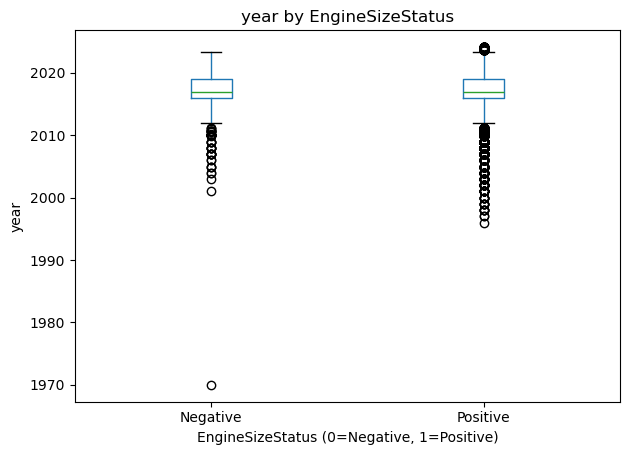

<Figure size 700x400 with 0 Axes>

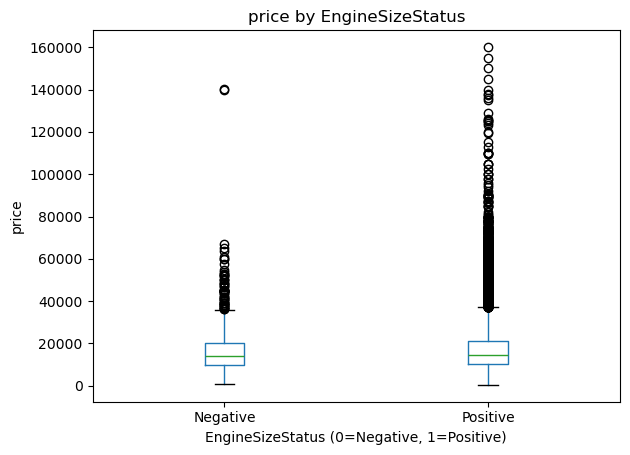

<Figure size 700x400 with 0 Axes>

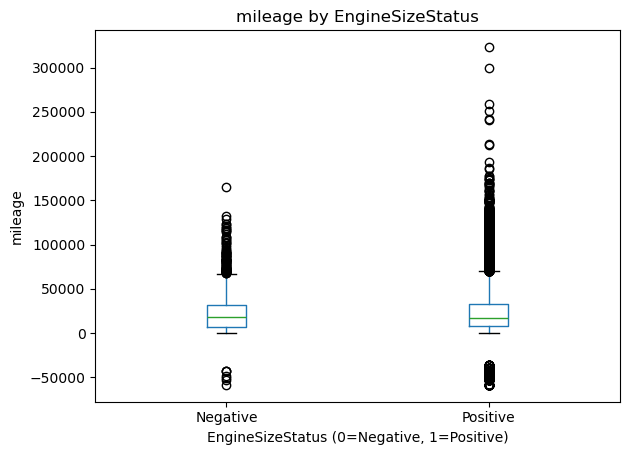

<Figure size 700x400 with 0 Axes>

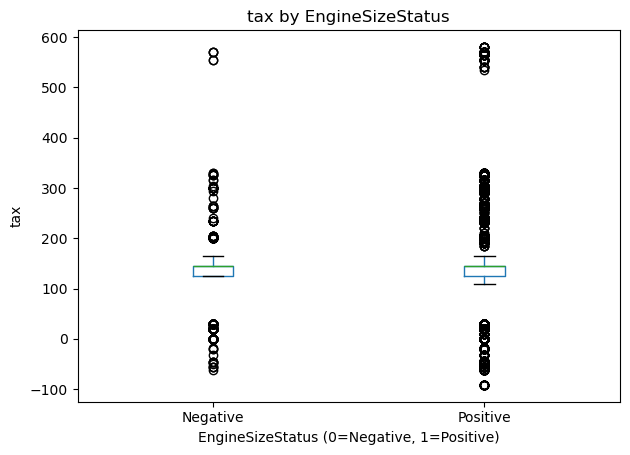

<Figure size 700x400 with 0 Axes>

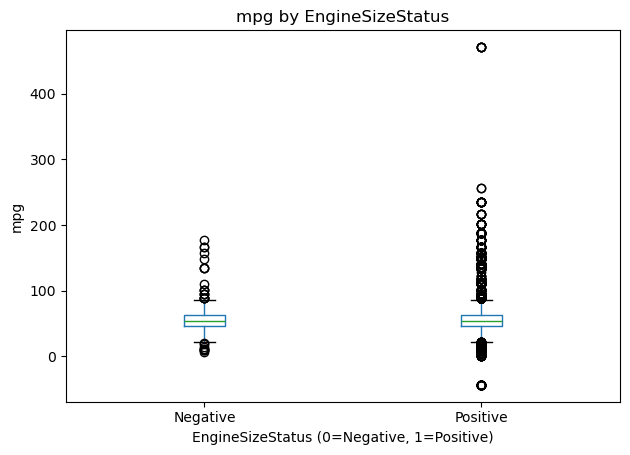

<Figure size 700x400 with 0 Axes>

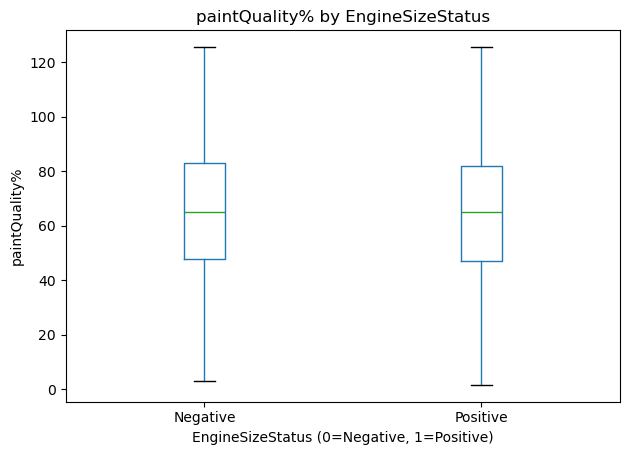

<Figure size 700x400 with 0 Axes>

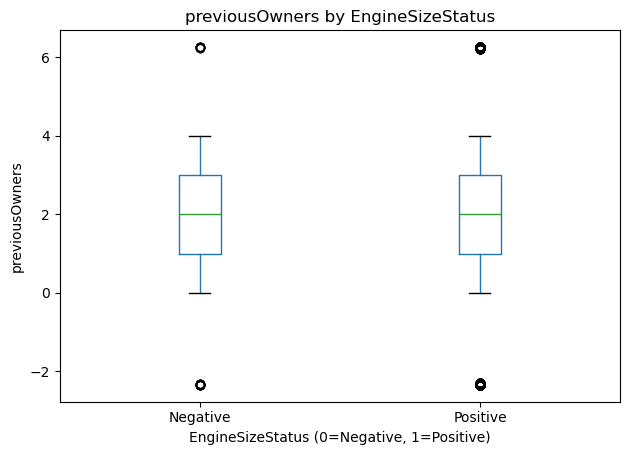

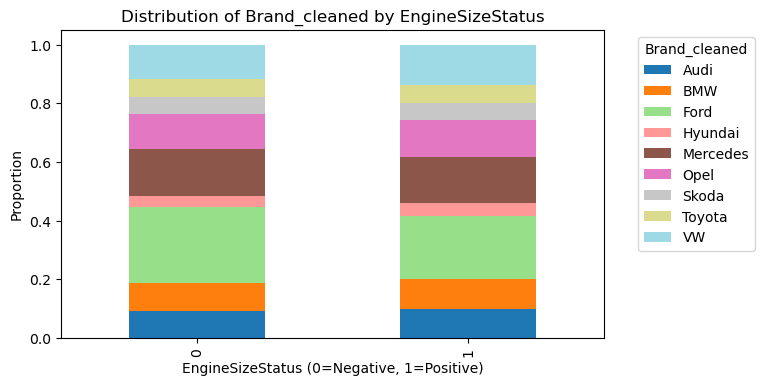

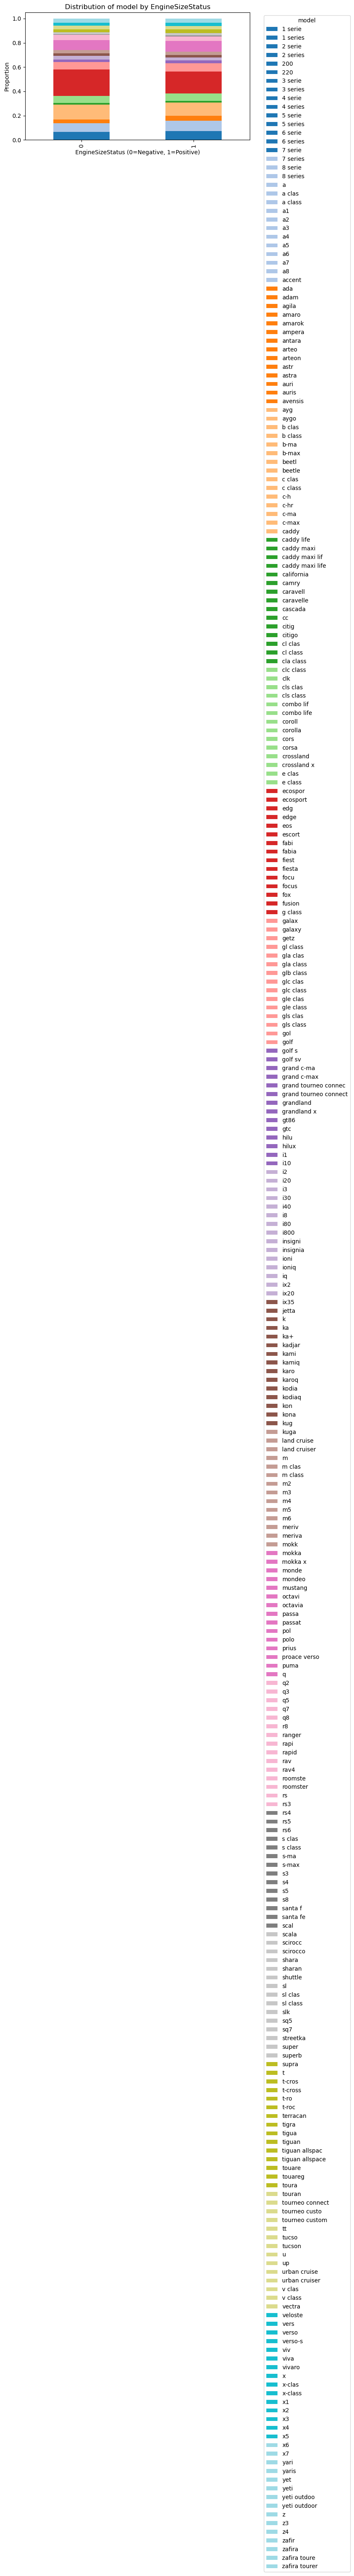

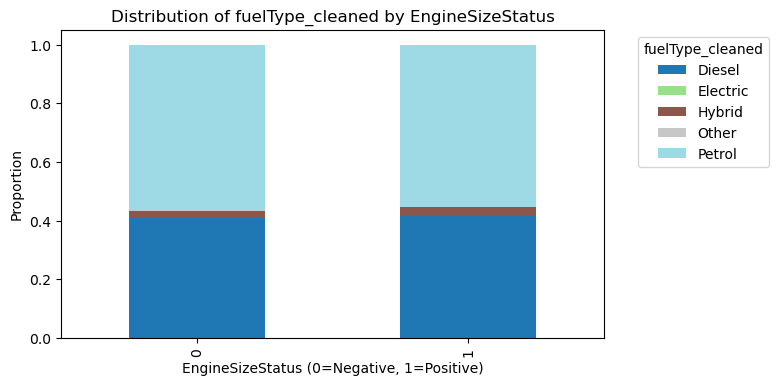

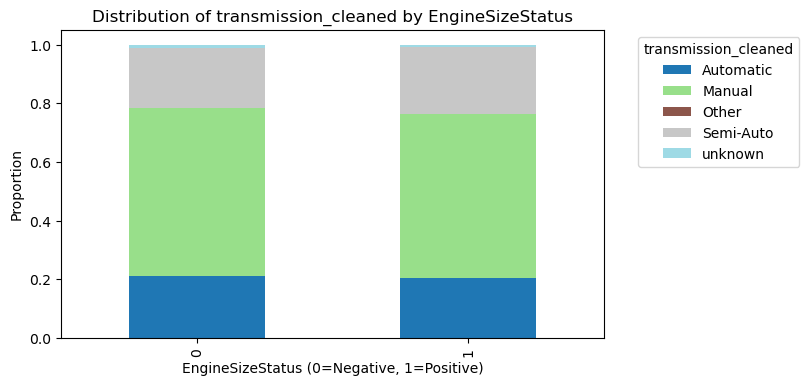

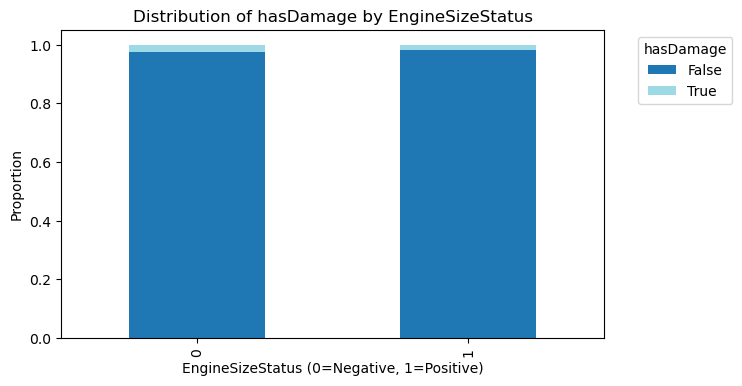

In [532]:
df_train_temp = df_train[df_train['engineSize']!=0]

#Numeric Variables
for col in numeric_features:
    if col not in df_train_temp.columns:
        continue
    plt.figure(figsize=(7, 4))
    df_train_temp.boxplot(column=col, by='EngineSizeStatus', grid=False)
    plt.title(f"{col} by EngineSizeStatus")
    plt.suptitle("")
    plt.xlabel("EngineSizeStatus (0=Negative, 1=Positive)")
    plt.ylabel(col)
    plt.xticks([1, 2], ['Negative', 'Positive'])
    plt.tight_layout()
    plt.show()

#Categorical Variables
for col in categorical_features:
    if col not in df_train_temp.columns:
        continue
    plt.figure(figsize=(7, 4))
    pd.crosstab(df_train_temp['EngineSizeStatus'], df_train_temp[col], normalize='index').plot(
        kind='bar', stacked=True, ax=plt.gca(), colormap='tab20'
    )
    plt.title(f"Distribution of {col} by EngineSizeStatus")
    plt.xlabel("EngineSizeStatus (0=Negative, 1=Positive)")
    plt.ylabel("Proportion")
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.show()

df_train.drop('EngineSizeStatus', axis=1, inplace=True)

<div class="alert alert-block alert-danger">

The negatives and positives show similar behavior. Should we do the correspondence?

Treat the zeros as NaN's.

</div>

### *mpg*

In [533]:
print(f'% of negative mpg: {round(df_train[df_train['mpg']<0].shape[0] / df_train.shape[0], 5)}')
print(f'% of 0 mpg: {round(df_train[df_train['mpg']==0].shape[0] / df_train.shape[0], 5)}')

% of negative mpg: 0.00047
% of 0 mpg: 0.0


In [581]:
print(f'% of observations outside of meaningful interval (10-70): {round(df_train[(df_train['mpg']<10) & (df_train['mpg']>70)].shape[0] / df_train.shape[0], 5)}')

% of observations outside of meaningful interval (10-70): 0.0


<div class="alert alert-block alert-danger">

No observations outside the range [10, 70].

</div>

In [536]:
#Change mpg of Eletrics to Unknown:
df_train.loc[df_train['fuelType']=='Electric', 'fuelType'] = 'Unknown'

Comparing the positives with the negatives:

##### Visualization:

In [541]:
df_train['mpgStatus'] = np.where(df_train['mpg'] >= 0, 1, 0)
    #1 if valid , 0 if invalid

In [542]:
categorical_features = ['Brand_cleaned', 'model','fuelType_cleaned', 'transmission_cleaned', 'hasDamage']
not_used=['Brand', 'transmission', 'fuelType', 'model_cleaned', 'mpg', 'mpgStatus']
numeric_features = df_train.columns.drop(categorical_features + not_used)

<Figure size 700x400 with 0 Axes>

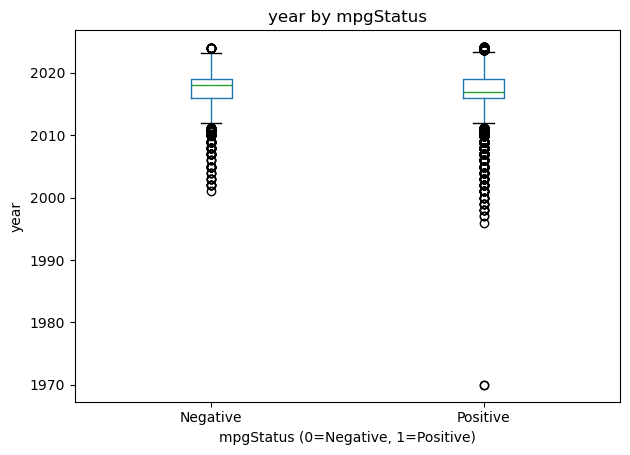

<Figure size 700x400 with 0 Axes>

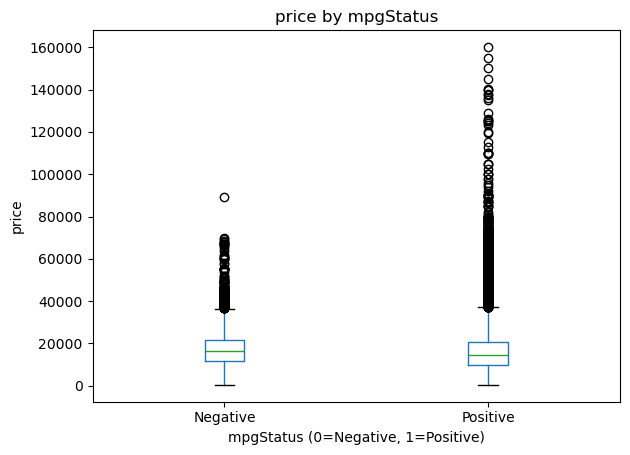

<Figure size 700x400 with 0 Axes>

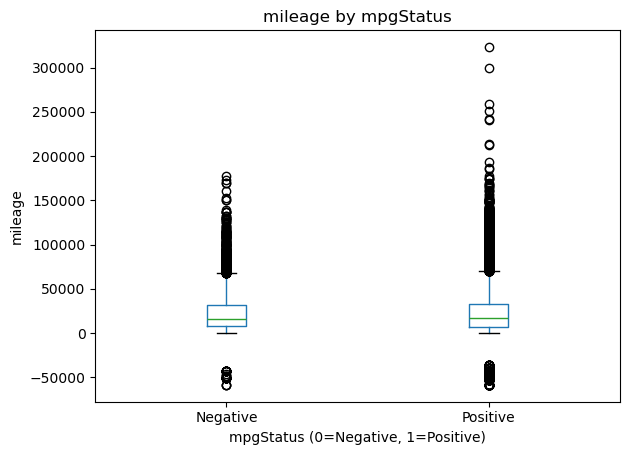

<Figure size 700x400 with 0 Axes>

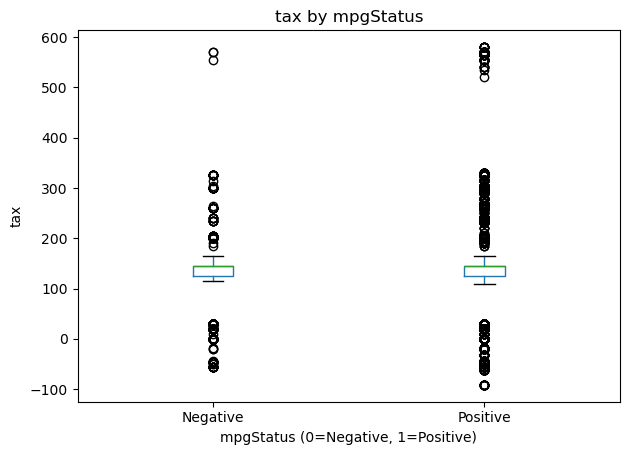

<Figure size 700x400 with 0 Axes>

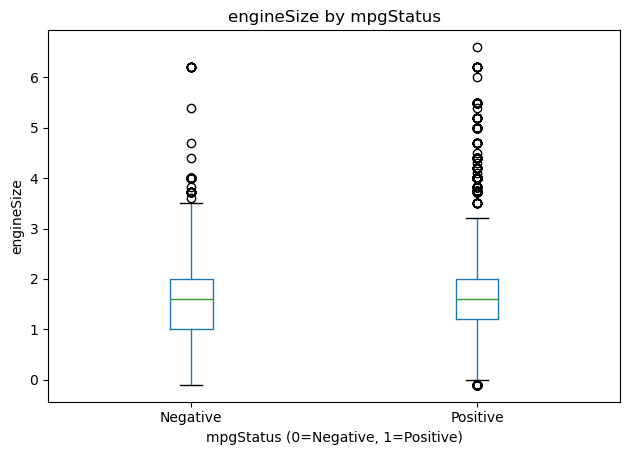

<Figure size 700x400 with 0 Axes>

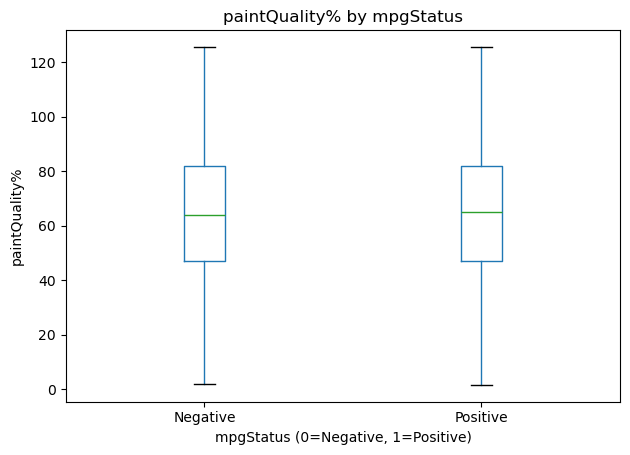

<Figure size 700x400 with 0 Axes>

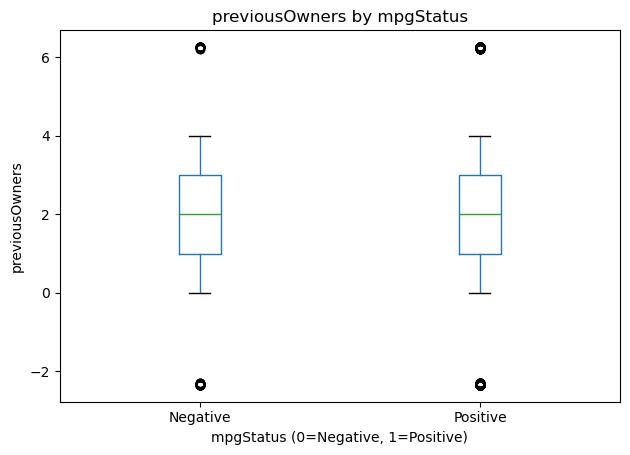

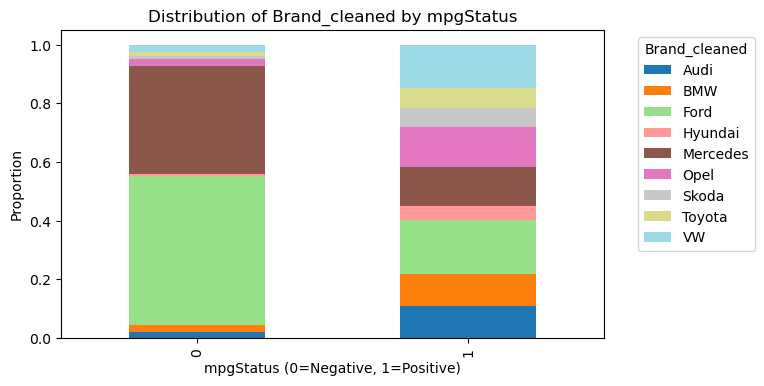

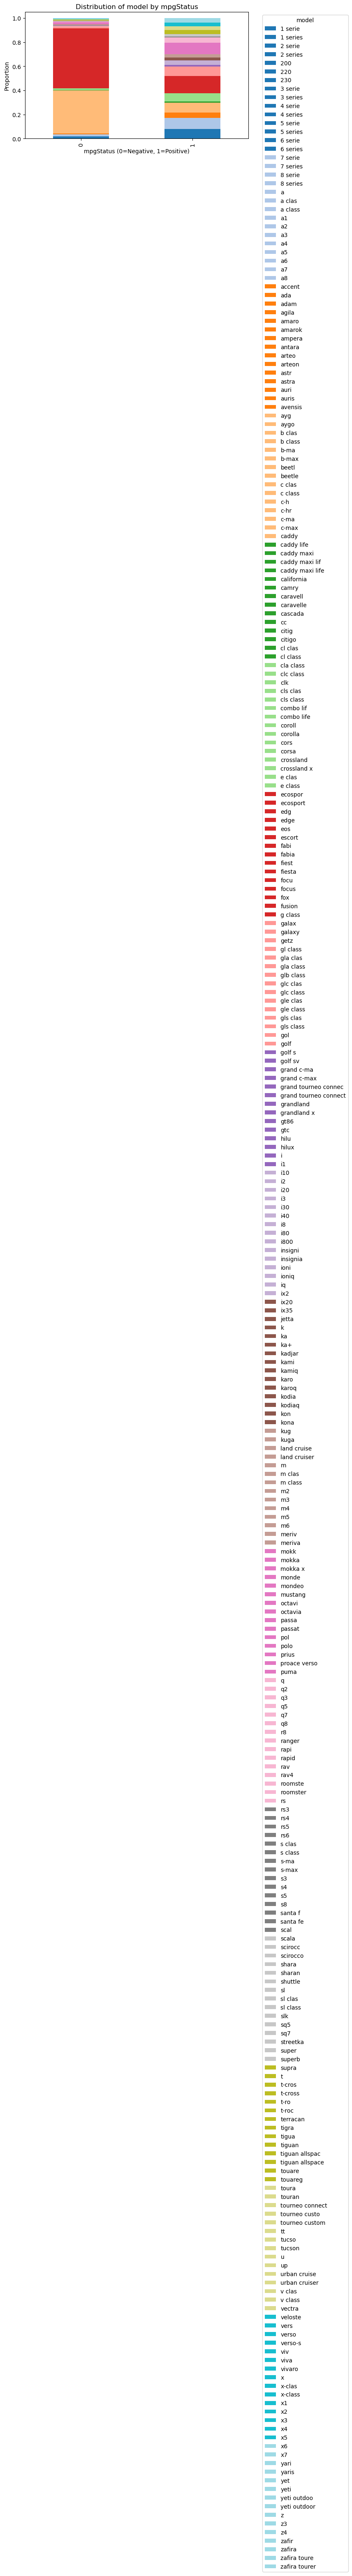

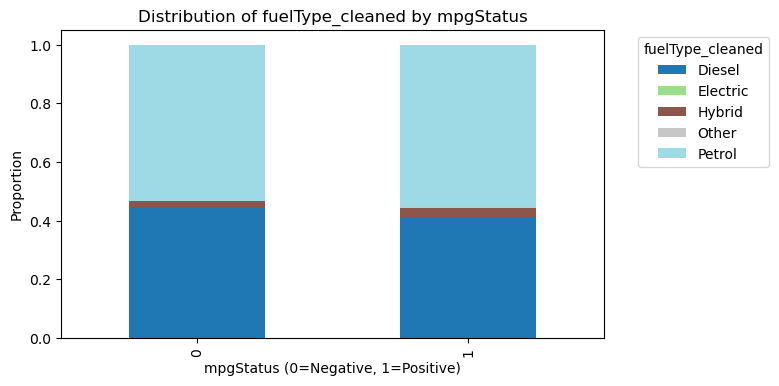

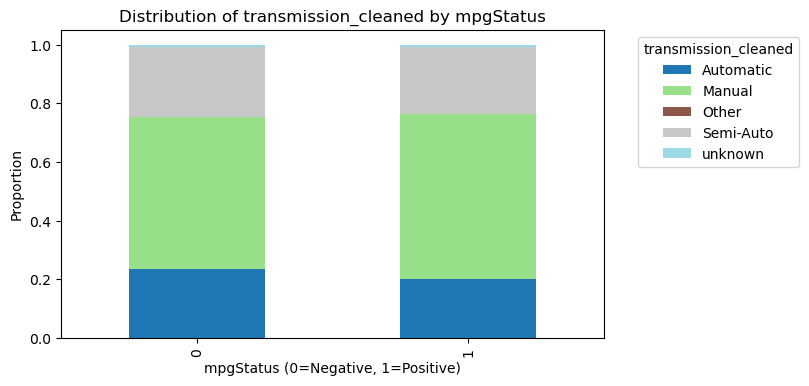

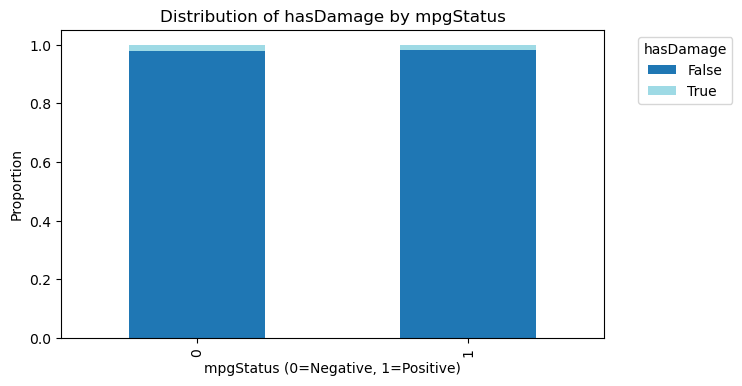

In [543]:
#Numeric Variables
for col in numeric_features:
    if col not in df_train.columns:
        continue
    plt.figure(figsize=(7, 4))
    df_train.boxplot(column=col, by='mpgStatus', grid=False)
    plt.title(f"{col} by mpgStatus")
    plt.suptitle("")
    plt.xlabel("mpgStatus (0=Negative, 1=Positive)")
    plt.ylabel(col)
    plt.xticks([1, 2], ['Negative', 'Positive'])
    plt.tight_layout()
    plt.show()

#Categorical Variables
for col in categorical_features:
    if col not in df_train.columns:
        continue
    plt.figure(figsize=(7, 4))
    pd.crosstab(df_train['mpgStatus'], df_train[col], normalize='index').plot(
        kind='bar', stacked=True, ax=plt.gca(), colormap='tab20'
    )
    plt.title(f"Distribution of {col} by mpgStatus")
    plt.xlabel("mpgStatus (0=Negative, 1=Positive)")
    plt.ylabel("Proportion")
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.show()

Clearly not similar. 

In [544]:
print('Of the invalid observations, how many are in each brand (in %):\n')
print(df_train[df_train['mpgStatus'] == 0]['Brand_cleaned'].value_counts(normalize=True).sort_values(ascending=False))

Of the invalid observations, how many are in each brand (in %):

Brand_cleaned
Ford        0.507120
Mercedes    0.368570
VW          0.026171
BMW         0.024888
Opel        0.024503
Audi        0.018345
Toyota      0.011546
Skoda       0.010135
Hyundai     0.008724
Name: proportion, dtype: float64


Most invalid observations are concentrated in the Ford and Mercedes group.

<Figure size 700x400 with 0 Axes>

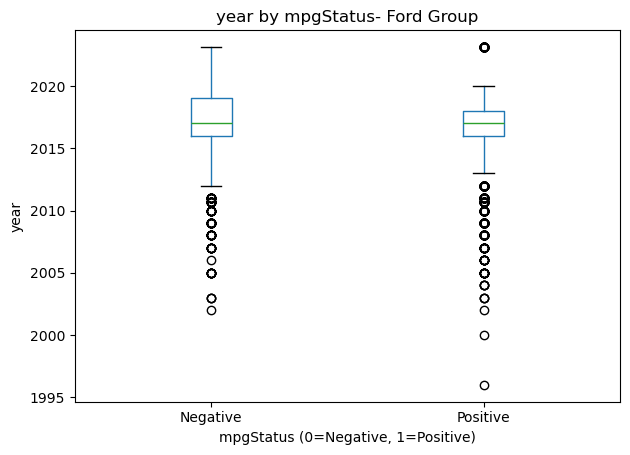

<Figure size 700x400 with 0 Axes>

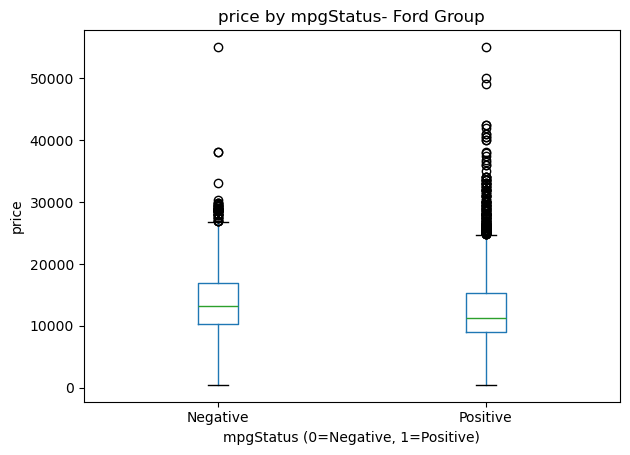

<Figure size 700x400 with 0 Axes>

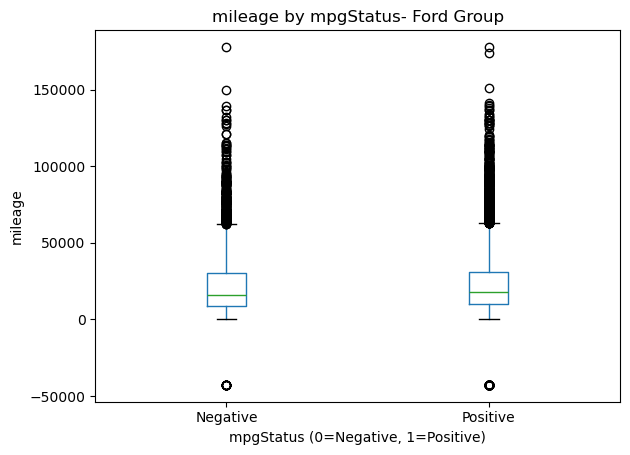

<Figure size 700x400 with 0 Axes>

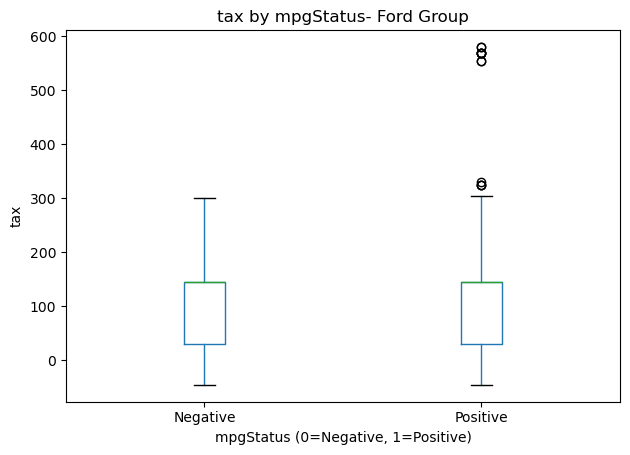

<Figure size 700x400 with 0 Axes>

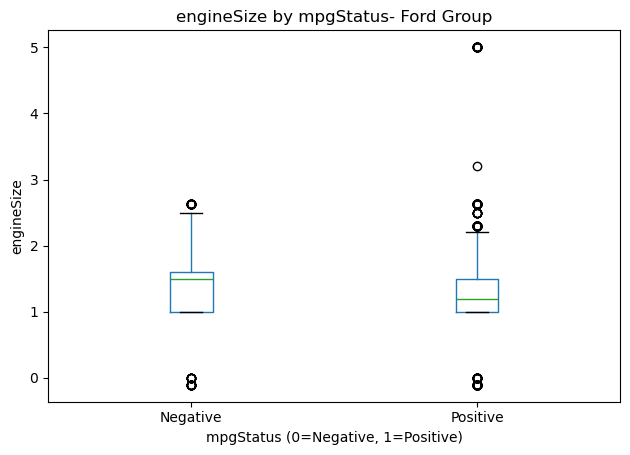

<Figure size 700x400 with 0 Axes>

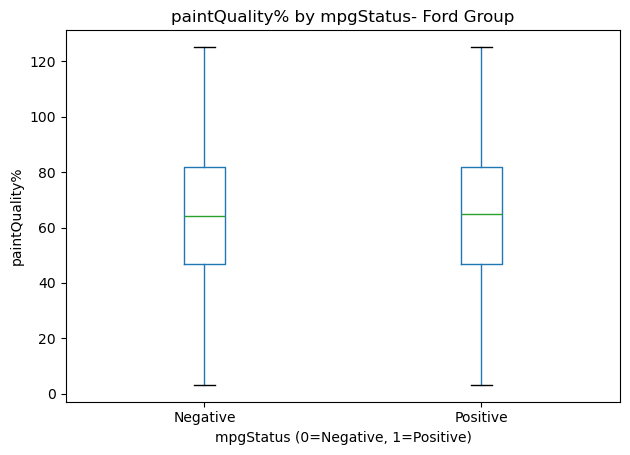

<Figure size 700x400 with 0 Axes>

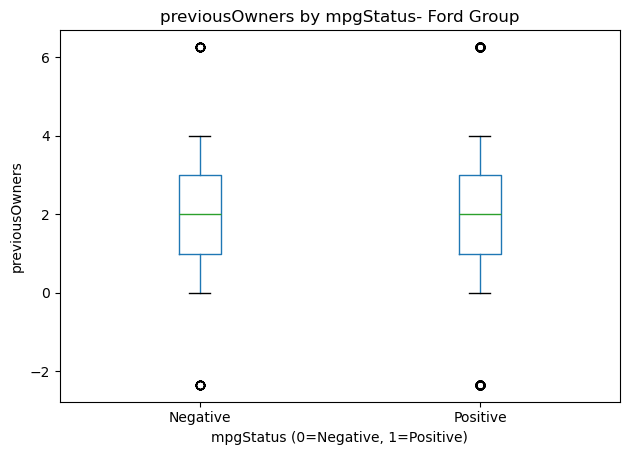

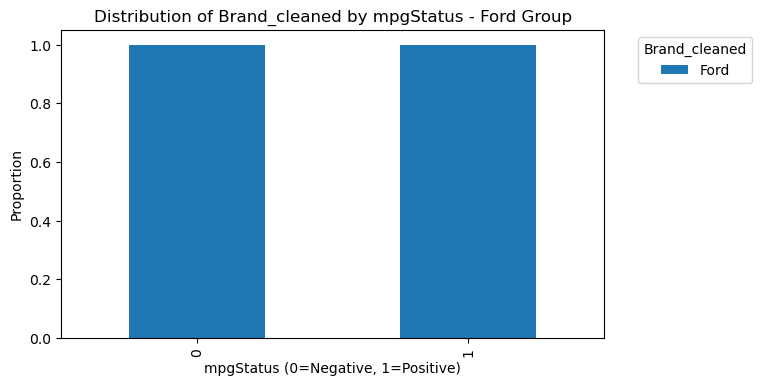

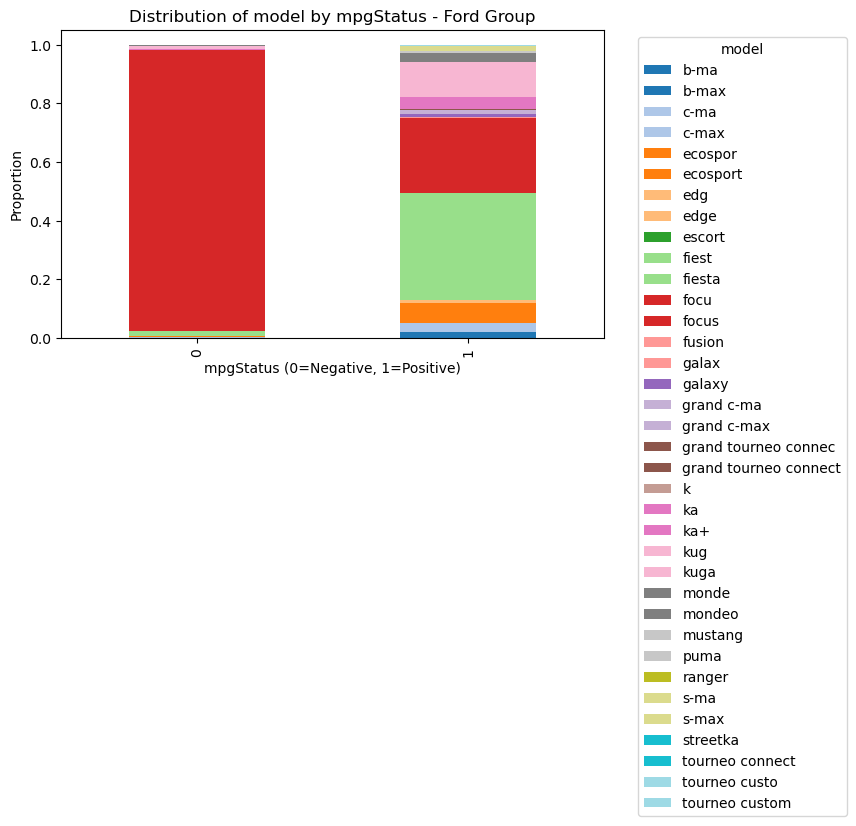

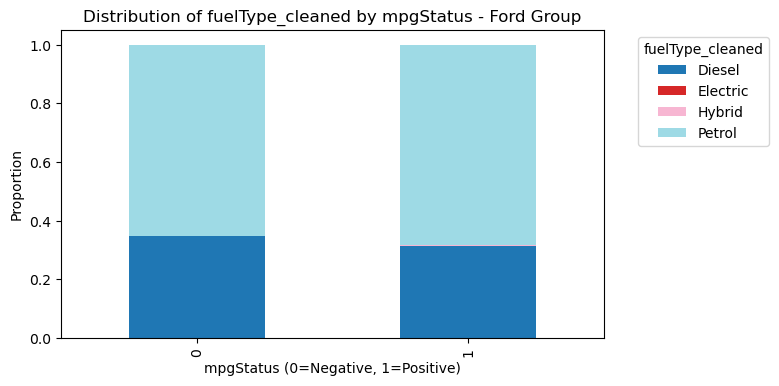

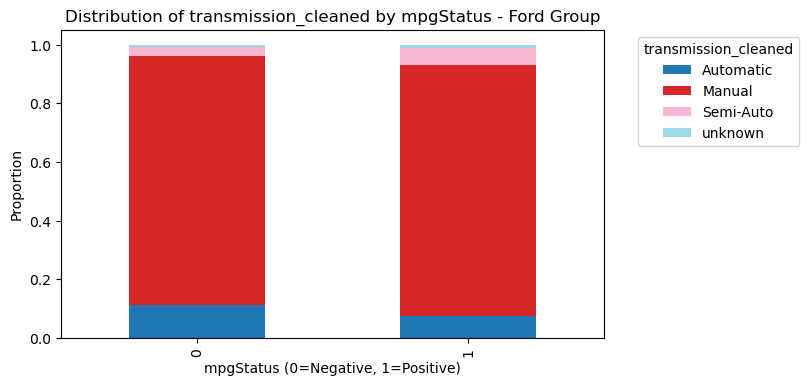

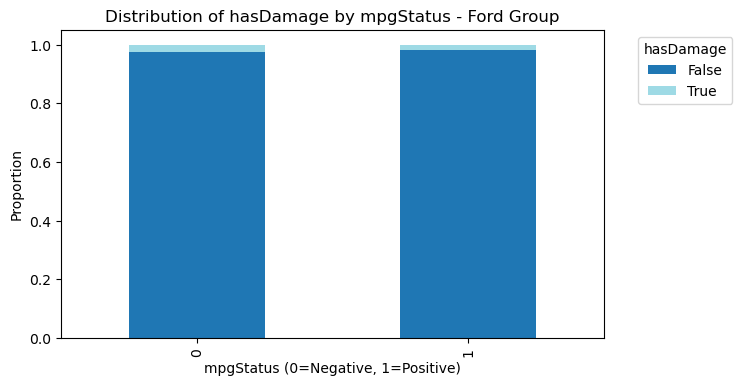

In [545]:
df_train_temp = df_train[df_train['Brand_cleaned']=='Ford']
#Numeric Variables
for col in numeric_features:
    if col not in df_train_temp.columns:
        continue
    plt.figure(figsize=(7, 4))
    df_train_temp.boxplot(column=col, by='mpgStatus', grid=False)
    plt.title(f"{col} by mpgStatus- Ford Group")
    plt.suptitle("")
    plt.xlabel("mpgStatus (0=Negative, 1=Positive)")
    plt.ylabel(col)
    plt.xticks([1, 2], ['Negative', 'Positive'])
    plt.tight_layout()
    plt.show()

#Categorical Variables
for col in categorical_features:
    if col not in df_train.columns:
        continue
    plt.figure(figsize=(7, 4))
    pd.crosstab(df_train_temp['mpgStatus'], df_train_temp[col], normalize='index').plot(
        kind='bar', stacked=True, ax=plt.gca(), colormap='tab20'
    )
    plt.title(f"Distribution of {col} by mpgStatus - Ford Group")
    plt.xlabel("mpgStatus (0=Negative, 1=Positive)")
    plt.ylabel("Proportion")
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.show()

**FORD GROUP**

The range of years is greater for invalid observations, and their average price and mileage is slightly higher.

The invalid observations are concentrated in some specfic models--> check again after cleaning the models. 

<Figure size 700x400 with 0 Axes>

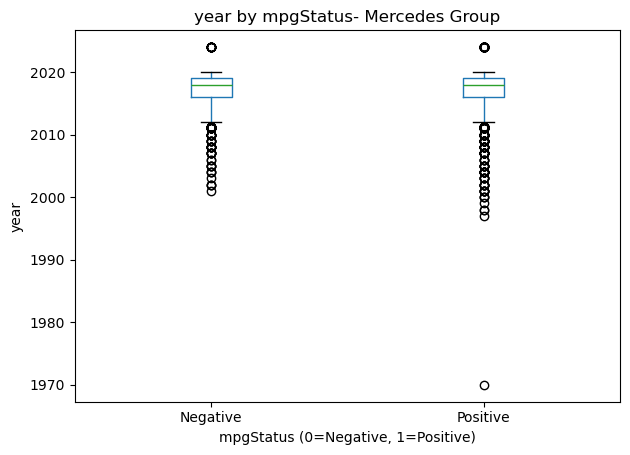

<Figure size 700x400 with 0 Axes>

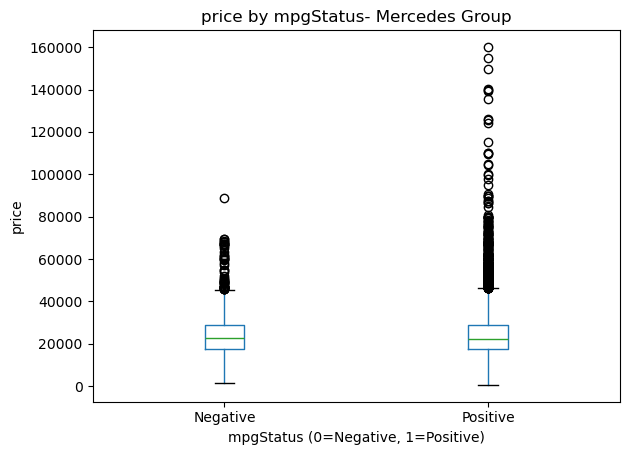

<Figure size 700x400 with 0 Axes>

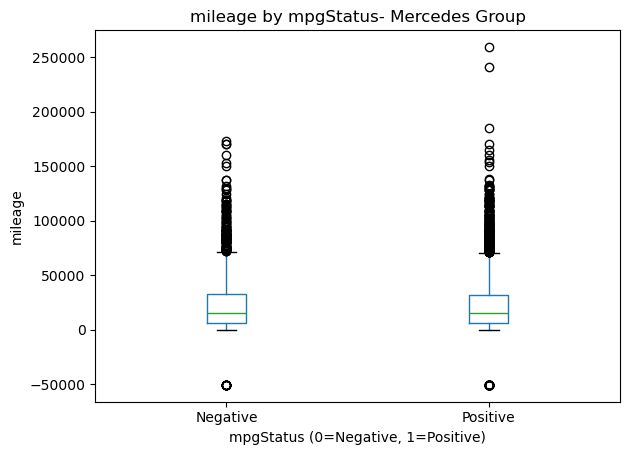

<Figure size 700x400 with 0 Axes>

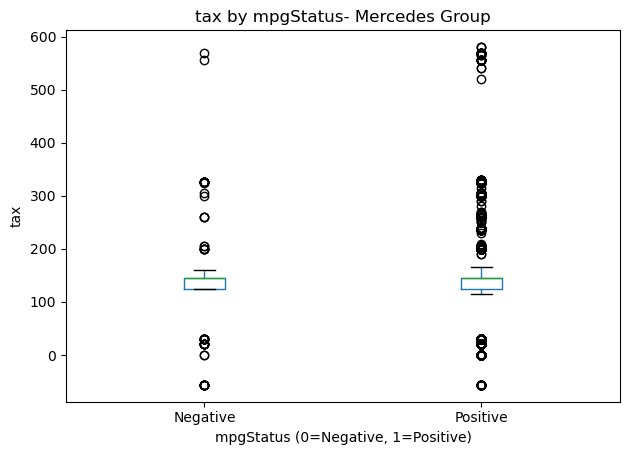

<Figure size 700x400 with 0 Axes>

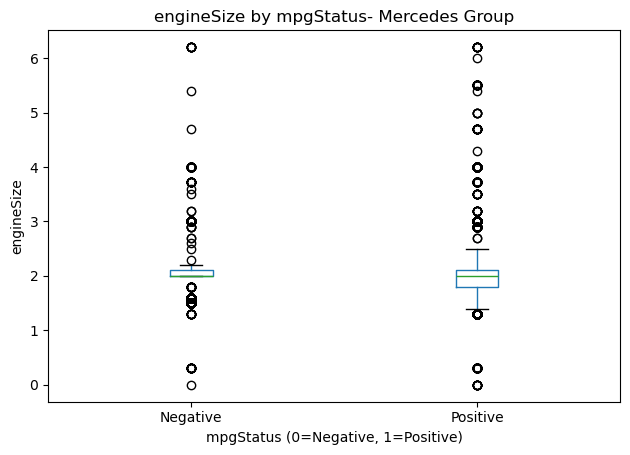

<Figure size 700x400 with 0 Axes>

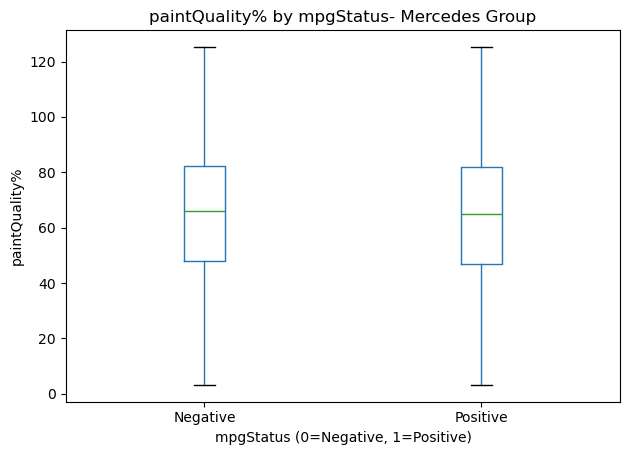

<Figure size 700x400 with 0 Axes>

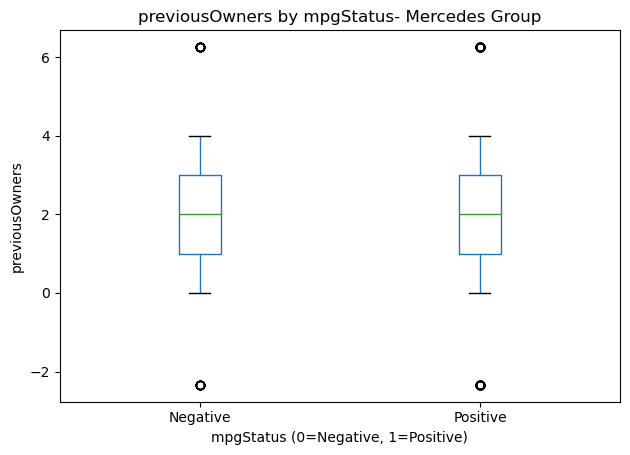

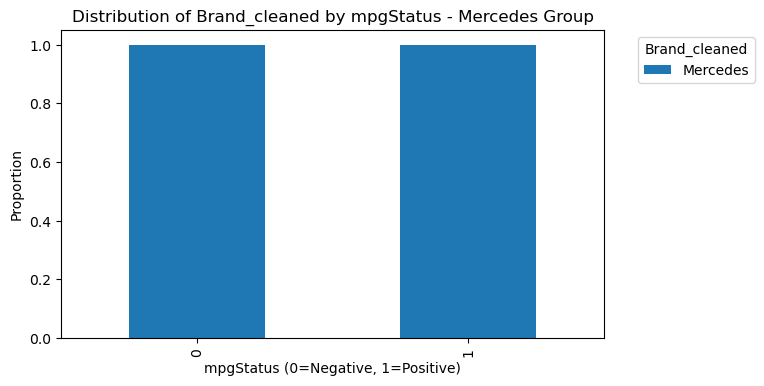

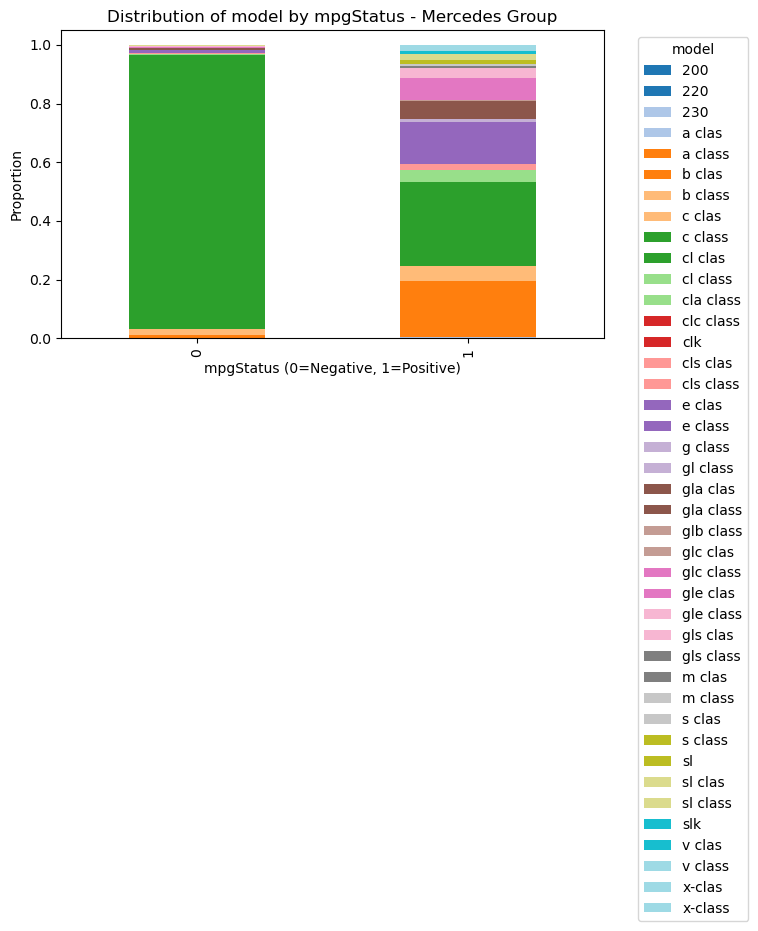

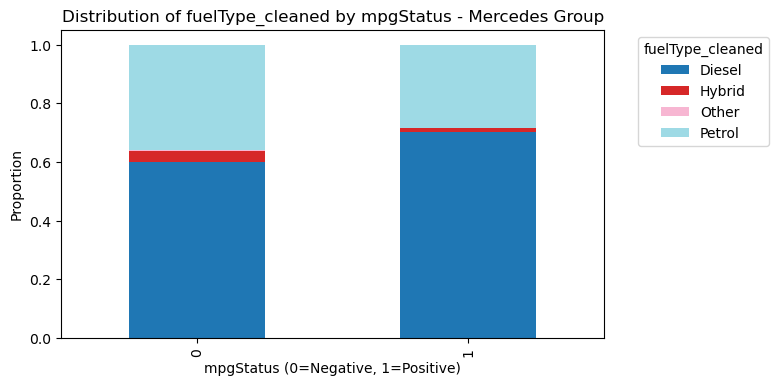

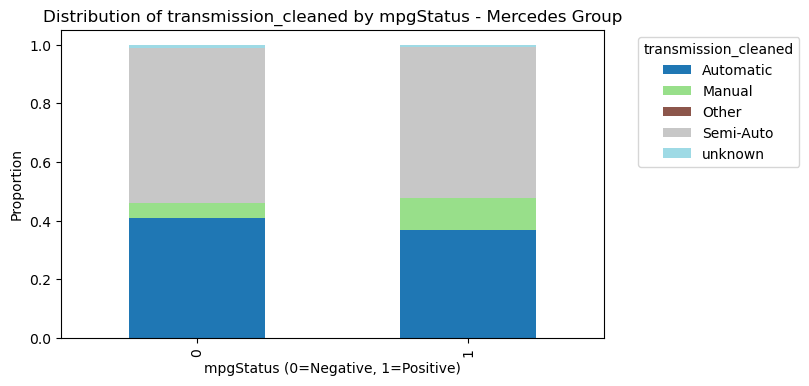

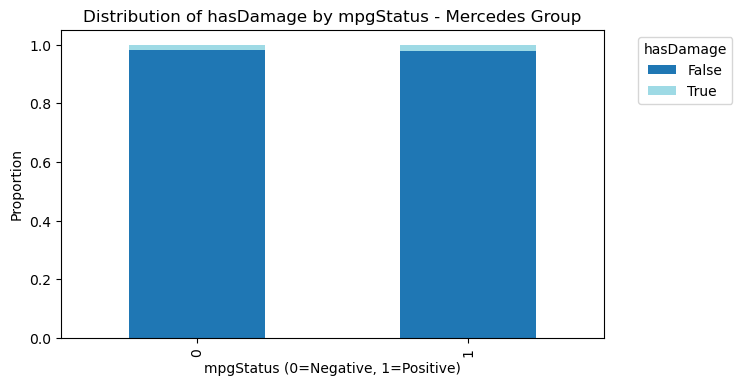

In [547]:
df_train_temp = df_train[df_train['Brand_cleaned']=='Mercedes']
#Numeric Variables
for col in numeric_features:
    if col not in df_train_temp.columns:
        continue
    plt.figure(figsize=(7, 4))
    df_train_temp.boxplot(column=col, by='mpgStatus', grid=False)
    plt.title(f"{col} by mpgStatus- Mercedes Group")
    plt.suptitle("")
    plt.xlabel("mpgStatus (0=Negative, 1=Positive)")
    plt.ylabel(col)
    plt.xticks([1, 2], ['Negative', 'Positive'])
    plt.tight_layout()
    plt.show()

#Categorical Variables
for col in categorical_features:
    if col not in df_train.columns:
        continue
    plt.figure(figsize=(7, 4))
    pd.crosstab(df_train_temp['mpgStatus'], df_train_temp[col], normalize='index').plot(
        kind='bar', stacked=True, ax=plt.gca(), colormap='tab20'
    )
    plt.title(f"Distribution of {col} by mpgStatus - Mercedes Group")
    plt.xlabel("mpgStatus (0=Negative, 1=Positive)")
    plt.ylabel("Proportion")
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.show()

**MERCEDES GROUP**

The invalid observations are concentrated in some specfic models--> check again after cleaning the models.

<div class="alert alert-block alert-danger">

The best thing is to consider the invalid observations as NaN's. 

Or (after cleaning the models) try to find the correspondence of these observations with the model group.

But for the other brands just treat them as NaN's?

</div>

In [551]:
df_train.drop('mpgStatus', axis=1, inplace=True)

### *tax*

In [550]:
print(f'% of negative tax: {round(df_train[df_train['tax']<0].shape[0] / df_train.shape[0], 5)}')
print(f'% of 0 tax: {round(df_train[df_train['tax']==0].shape[0] / df_train.shape[0], 5)}')

% of negative tax: 0.00498
% of 0 tax: 0.05686


Comparing the positives with the negatives:

##### Visualization:

In [553]:
df_train['taxStatus'] = np.where(df_train['tax'] >= 0, 1, 0)
    #1 if valid , 0 if invalid

In [554]:
categorical_features = ['Brand_cleaned', 'model','fuelType_cleaned', 'transmission_cleaned', 'hasDamage']
not_used=['Brand', 'transmission', 'fuelType', 'model_cleaned', 'tax', 'taxStatus']
numeric_features = df_train.columns.drop(categorical_features + not_used)

<Figure size 700x400 with 0 Axes>

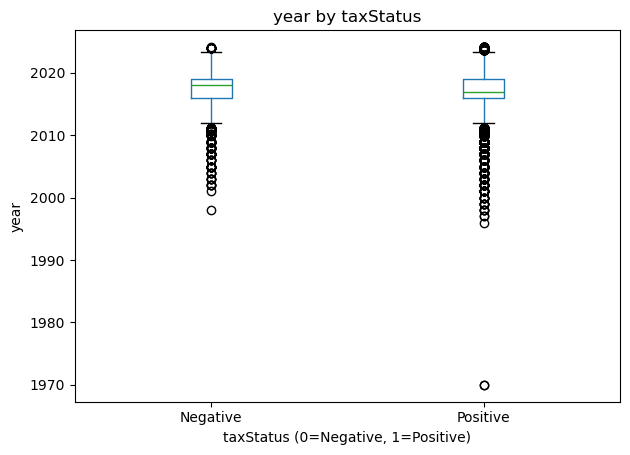

<Figure size 700x400 with 0 Axes>

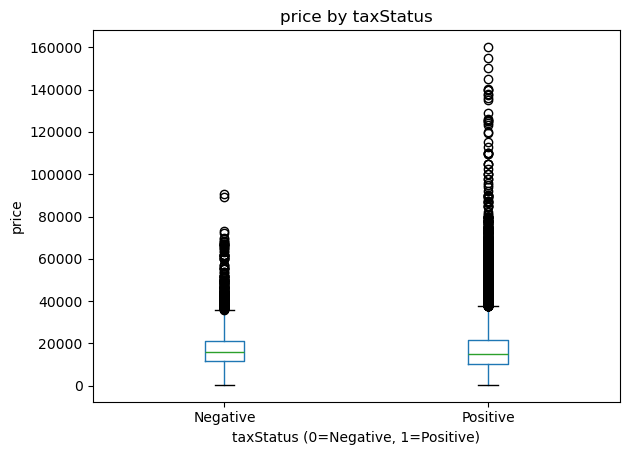

<Figure size 700x400 with 0 Axes>

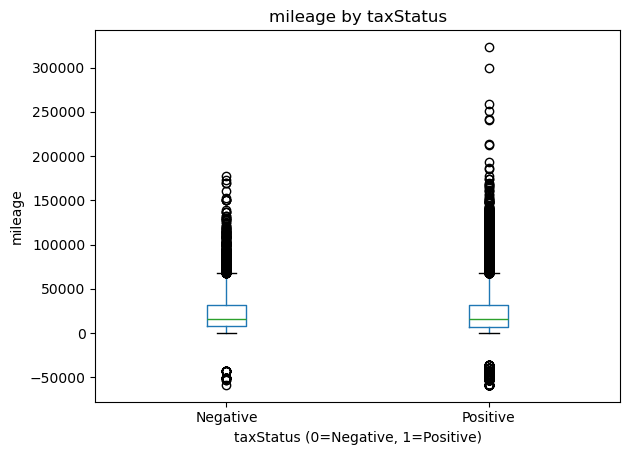

<Figure size 700x400 with 0 Axes>

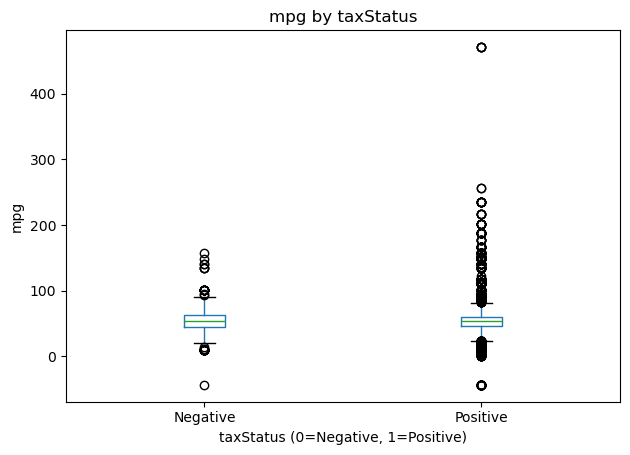

<Figure size 700x400 with 0 Axes>

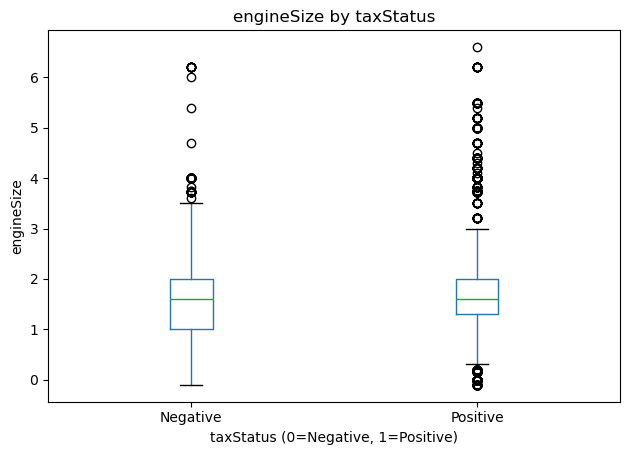

<Figure size 700x400 with 0 Axes>

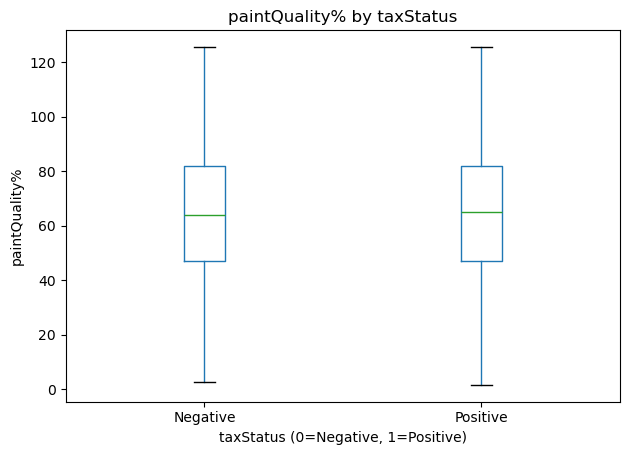

<Figure size 700x400 with 0 Axes>

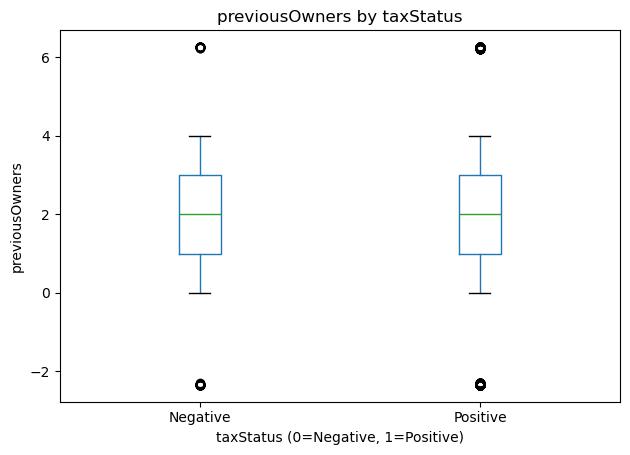

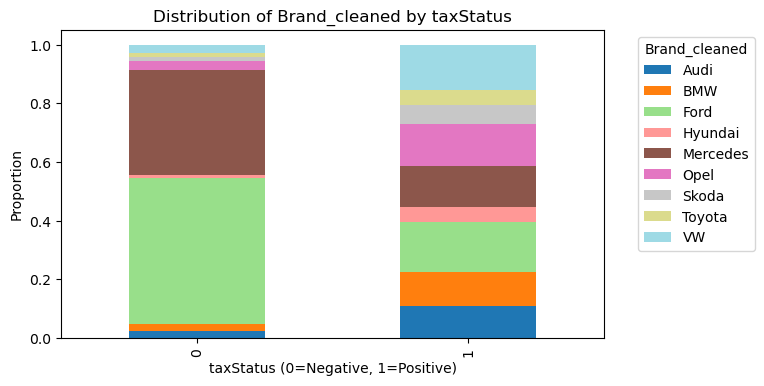

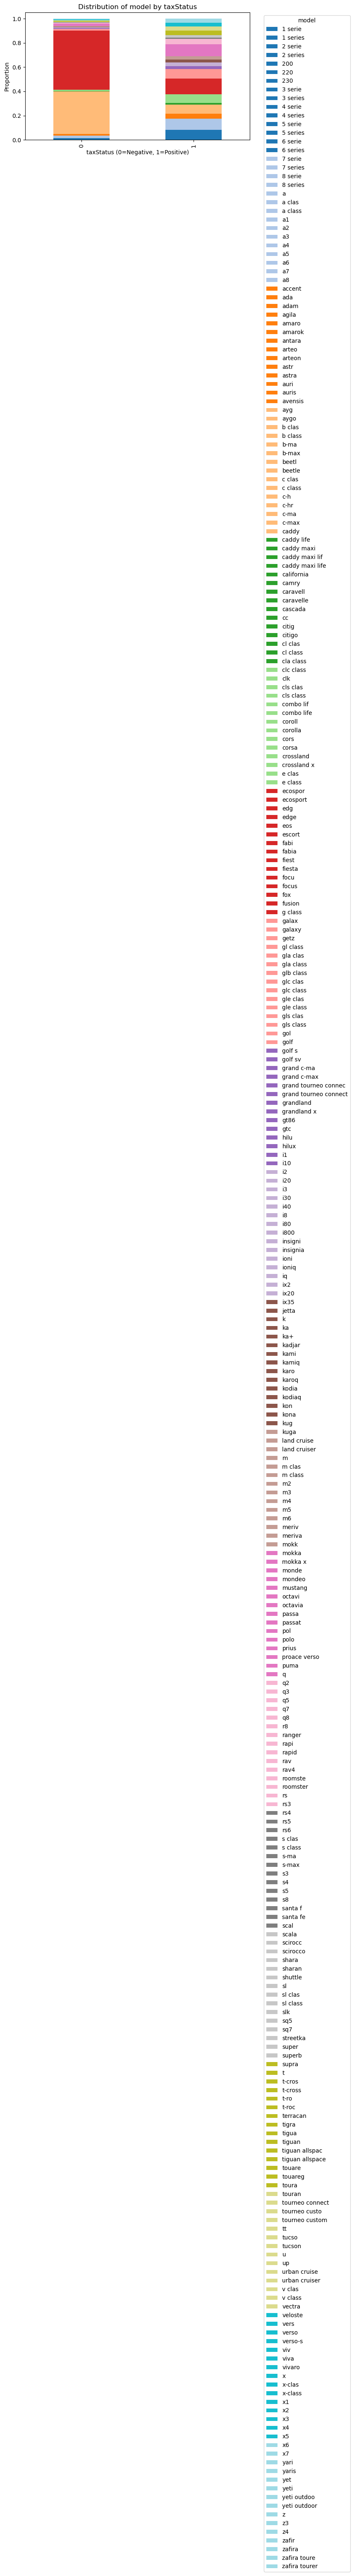

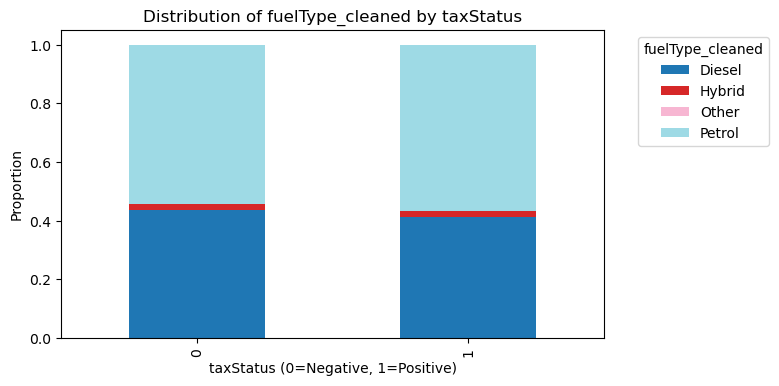

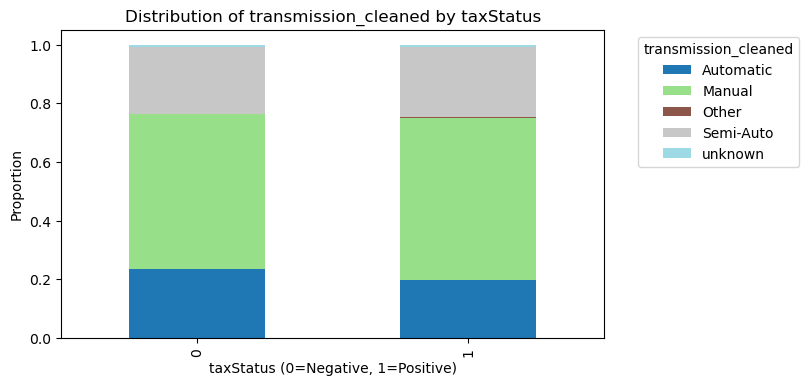

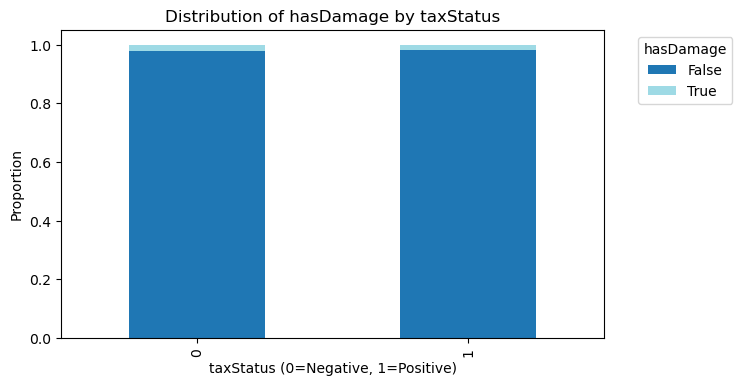

In [556]:
df_train_temp = df_train[df_train['tax']!=0]

#Numeric Variables
for col in numeric_features:
    if col not in df_train_temp.columns:
        continue
    plt.figure(figsize=(7, 4))
    df_train_temp.boxplot(column=col, by='taxStatus', grid=False)
    plt.title(f"{col} by taxStatus")
    plt.suptitle("")
    plt.xlabel("taxStatus (0=Negative, 1=Positive)")
    plt.ylabel(col)
    plt.xticks([1, 2], ['Negative', 'Positive'])
    plt.tight_layout()
    plt.show()

#Categorical Variables
for col in categorical_features:
    if col not in df_train_temp.columns:
        continue
    plt.figure(figsize=(7, 4))
    pd.crosstab(df_train_temp['taxStatus'], df_train_temp[col], normalize='index').plot(
        kind='bar', stacked=True, ax=plt.gca(), colormap='tab20'
    )
    plt.title(f"Distribution of {col} by taxStatus")
    plt.xlabel("taxStatus (0=Negative, 1=Positive)")
    plt.ylabel("Proportion")
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.show()

df_train.drop('taxStatus', axis=1, inplace=True)

<div class="alert alert-block alert-danger">

Too different. Treat negatives and 0's as NaN's.

</div>

### *mileage*

In [557]:
print(f'% of negative mileage: {round(df_train[df_train['mileage']<0].shape[0] / df_train.shape[0], 5)}')
print(f'% of 0 mileage: {round(df_train[df_train['mileage']==0].shape[0] / df_train.shape[0], 5)}')

% of negative mileage: 0.00486
% of 0 mileage: 0.0


Comparing the positives with the negatives:

##### Visualization:

In [561]:
df_train['mileageStatus'] = np.where(df_train['tax'] >= 0, 1, 0)
    #1 if valid , 0 if invalid

In [562]:
categorical_features = ['Brand_cleaned', 'model','fuelType_cleaned', 'transmission_cleaned', 'hasDamage']
not_used=['Brand', 'transmission', 'fuelType', 'model_cleaned', 'mileage', 'mileageStatus']
numeric_features = df_train.columns.drop(categorical_features + not_used)

<Figure size 700x400 with 0 Axes>

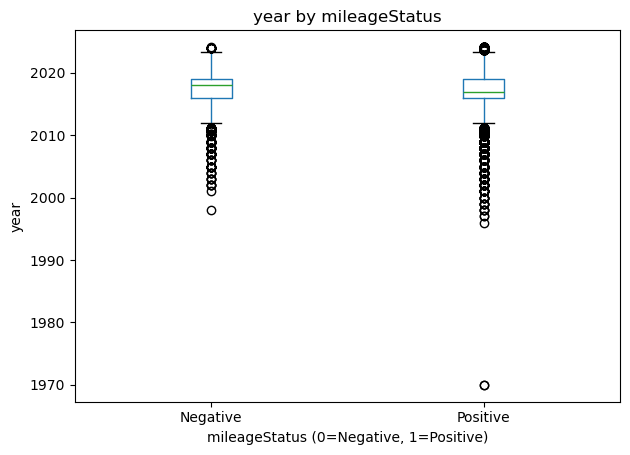

<Figure size 700x400 with 0 Axes>

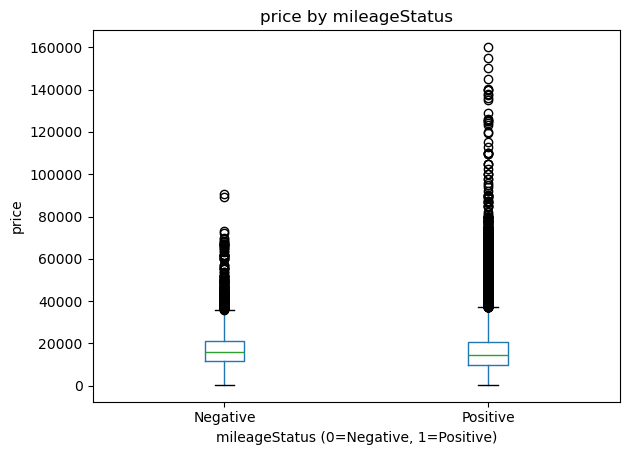

<Figure size 700x400 with 0 Axes>

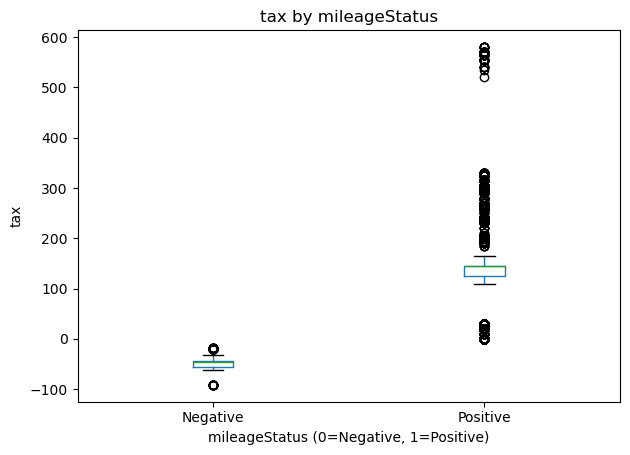

<Figure size 700x400 with 0 Axes>

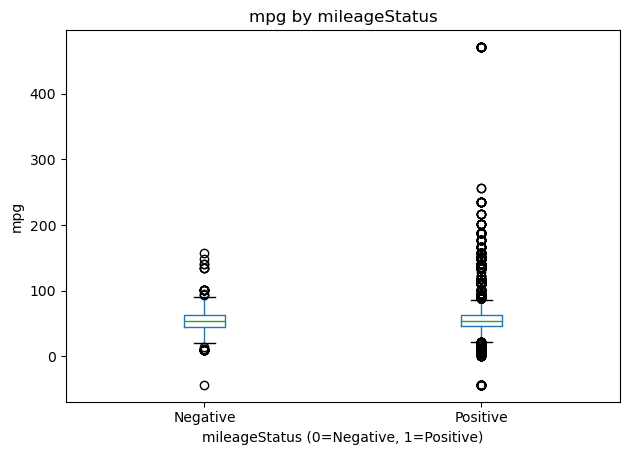

<Figure size 700x400 with 0 Axes>

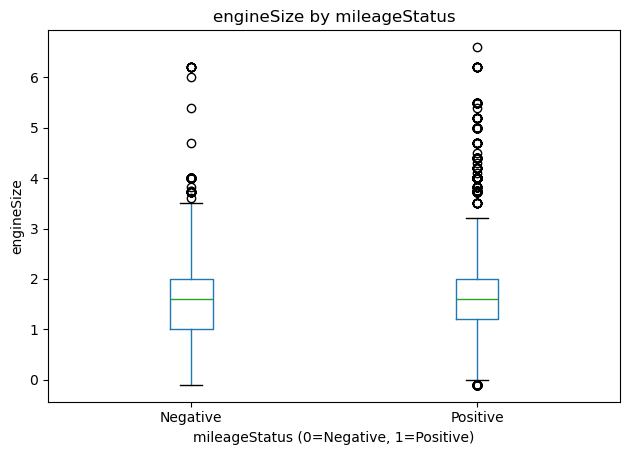

<Figure size 700x400 with 0 Axes>

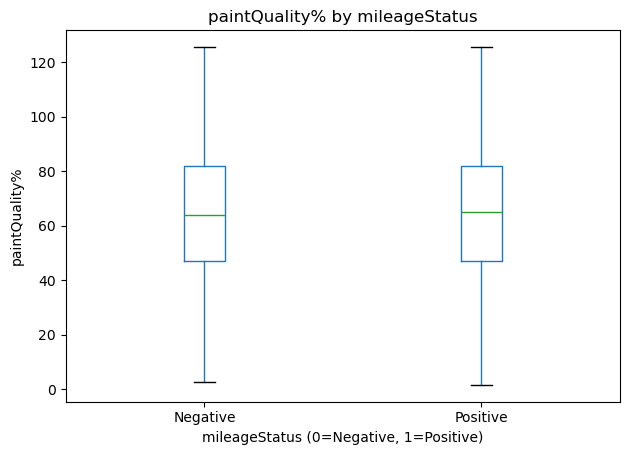

<Figure size 700x400 with 0 Axes>

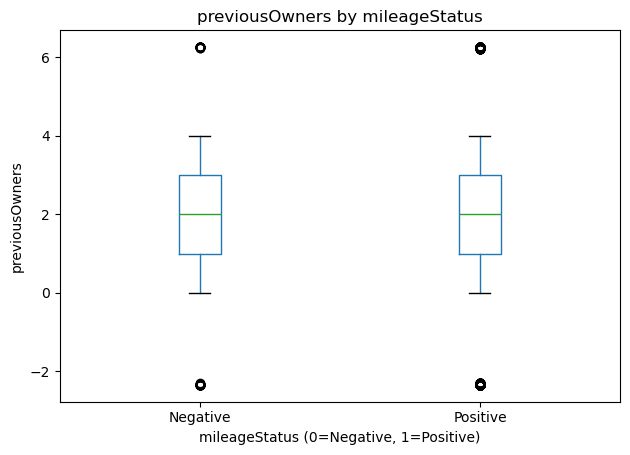

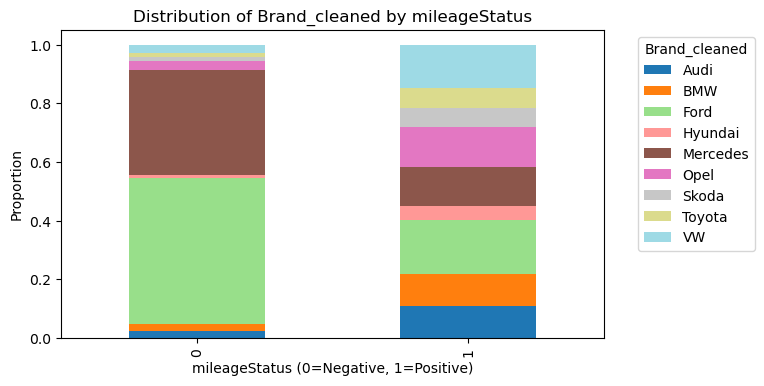

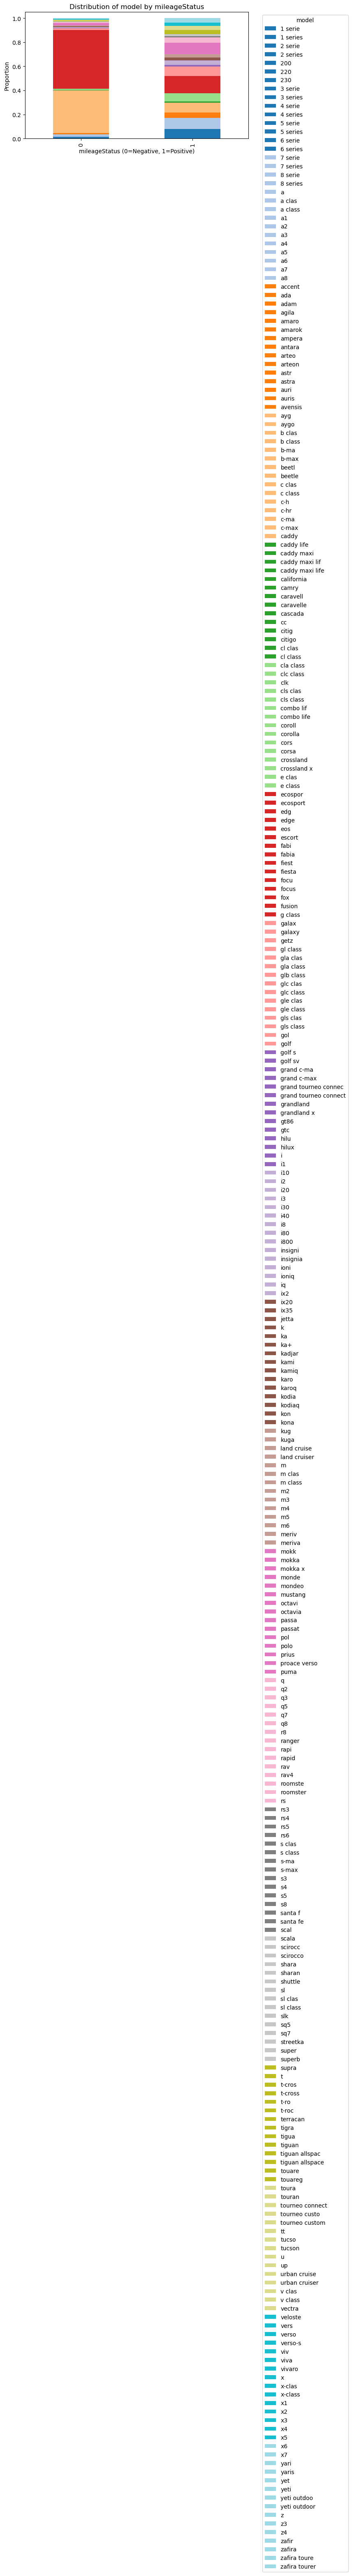

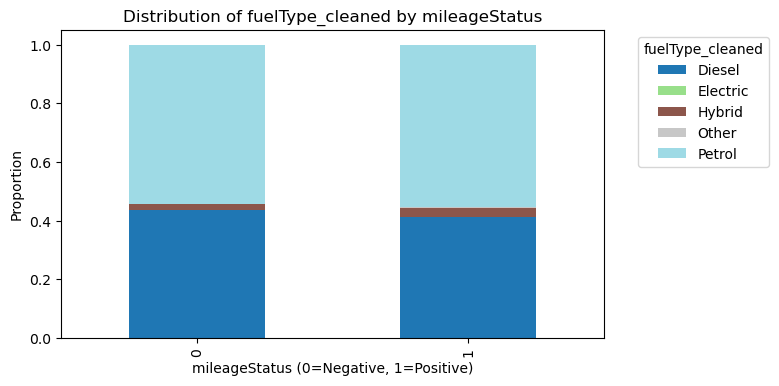

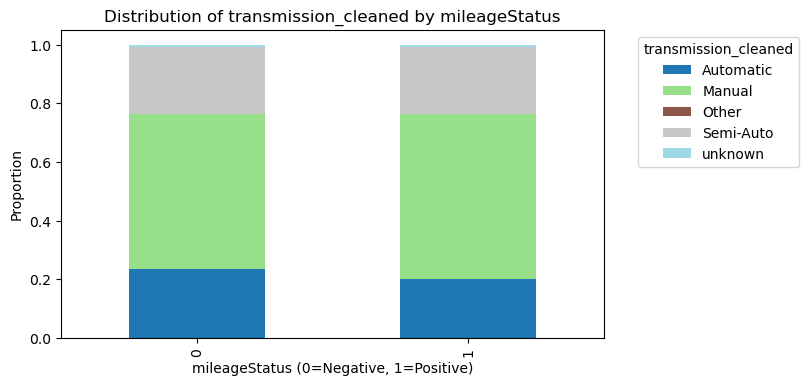

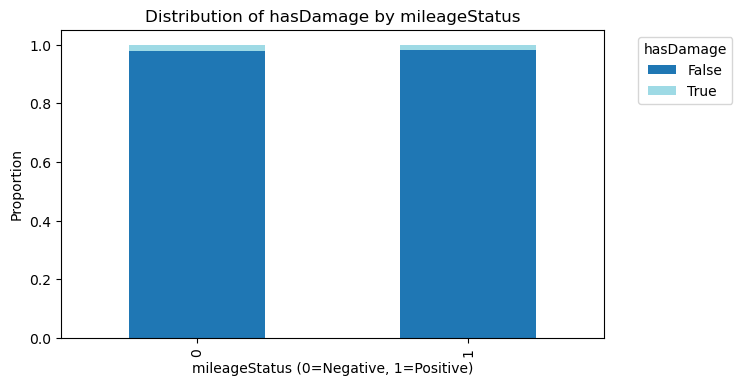

In [563]:
df_train_temp = df_train[df_train['mileage']!=0]

#Numeric Variables
for col in numeric_features:
    if col not in df_train_temp.columns:
        continue
    plt.figure(figsize=(7, 4))
    df_train_temp.boxplot(column=col, by='mileageStatus', grid=False)
    plt.title(f"{col} by mileageStatus")
    plt.suptitle("")
    plt.xlabel("mileageStatus (0=Negative, 1=Positive)")
    plt.ylabel(col)
    plt.xticks([1, 2], ['Negative', 'Positive'])
    plt.tight_layout()
    plt.show()

#Categorical Variables
for col in categorical_features:
    if col not in df_train_temp.columns:
        continue
    plt.figure(figsize=(7, 4))
    pd.crosstab(df_train_temp['mileageStatus'], df_train_temp[col], normalize='index').plot(
        kind='bar', stacked=True, ax=plt.gca(), colormap='tab20'
    )
    plt.title(f"Distribution of {col} by mileageStatus")
    plt.xlabel("mileageStatus (0=Negative, 1=Positive)")
    plt.ylabel("Proportion")
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.show()

df_train.drop('mileageStatus', axis=1, inplace=True)

<div class="alert alert-block alert-danger">

Too different. Treat negatives as NaN's.

Are these errors related to the errors in tax and mpg?

</div>

### *year*

In [564]:
df_train['year'].unique()

array([2016.        , 2019.        , 2018.        , 2014.        ,
       2017.        , 2020.        , 2013.        ,           nan,
       2015.        , 2023.36707842, 2011.        , 2012.        ,
       2023.1169636 , 2003.        , 2009.        , 2007.        ,
       2005.        , 2011.11118842, 2011.21085349, 2023.97731126,
       2004.        , 2010.        , 2010.56500919, 2008.        ,
       2024.12175905, 2006.        , 2023.60527574, 2023.38982198,
       2010.67696784, 2001.        , 2000.        , 2023.26798867,
       2010.26863473, 2010.37154646, 2002.        , 2022.69668507,
       2009.81675711, 2010.7464032 , 2012.69574039, 1996.        ,
       1998.        , 2022.87800554, 1970.        , 1999.        ,
       1997.        ])

In [565]:
df_train[df_train['year']==1970]
#these observations are outliers and the second does not make sense (automatic and year=1970) --> drop them

Brand    model    year  price transmission  mileage fuelType    tax  \
carID                                                                           
62732      OPEL   zafira  1970.0  10495       Manual  37357.0      NaN  200.0   
35769  Mercedes  m class  1970.0  24999    Automatic  14000.0   Diesel  305.0   

        mpg  engineSize  paintQuality%  previousOwners  hasDamage  \
carID                                                               
62732  42.2         NaN           60.0             2.0      False   
35769  39.2         0.0           44.0             3.0      False   

      Brand_cleaned model_cleaned fuelType_cleaned transmission_cleaned  
carID                                                                    
62732          Opel        fiesta              NaN               Manual  
35769      Mercedes        fiesta           Diesel            Automatic

In [566]:
df_train = df_train[df_train['year']!=1970]

In [140]:
df_train['year'].unique()

array([2019., 2014., 2017., 2018., 2020., 2016., 2013., 2015., 2023.,
         nan, 2011., 2003., 2012., 2009., 2007., 2008., 2024., 2010.,
       2006., 2001., 2000., 2005., 2004., 2002., 1996., 1999., 1998.,
       1997.])

## Visualization

In [574]:
categorical_features = ['Brand_cleaned', 'model', 'transmission_cleaned', 'fuelType_cleaned', 'hasDamage']
not_used_for_now=['model_cleaned', 'Brand','transmission','fuelType']
numeric_features = df_train.columns.drop(categorical_features + not_used_for_now)
numeric_features

Index(['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%',
       'previousOwners'],
      dtype='object')

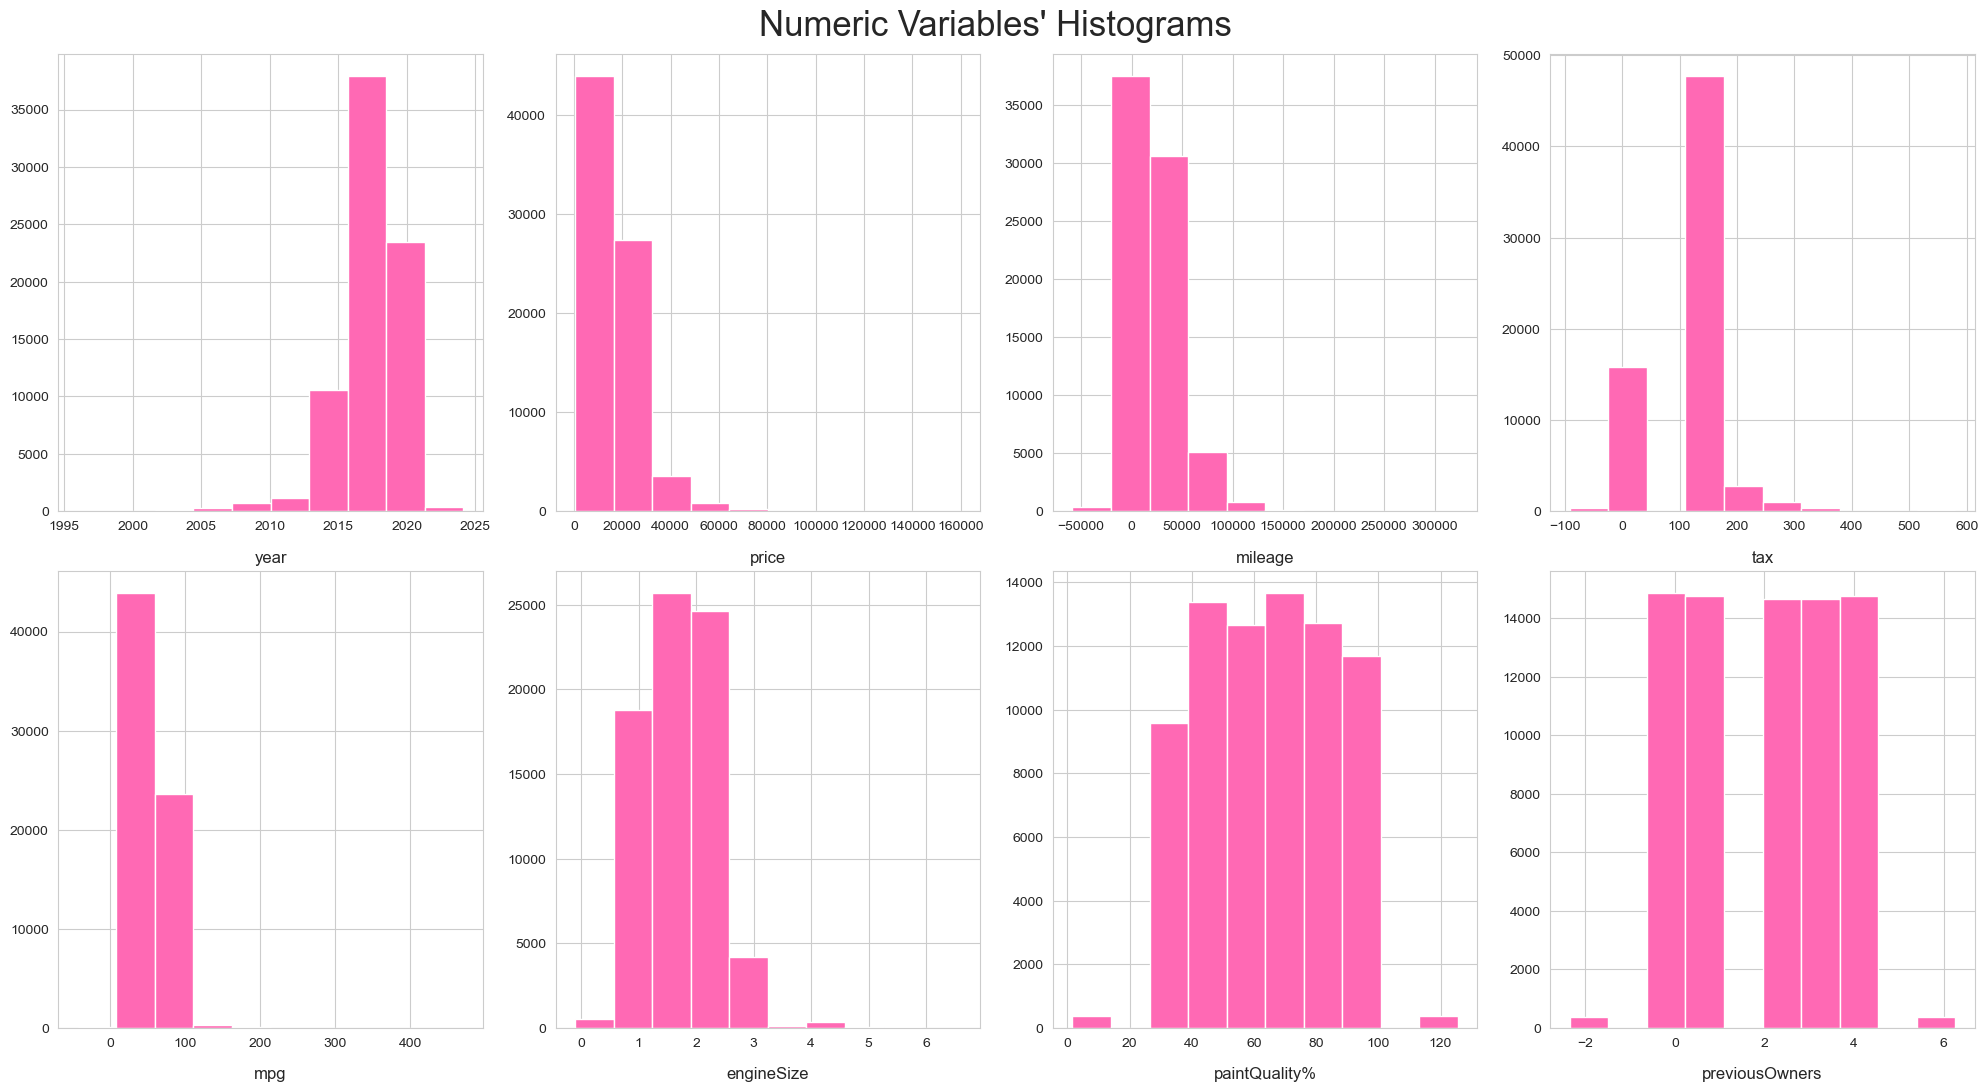

In [575]:
sns.set_style('whitegrid')

# We will put all the numeric variables' histograms in one figure
# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(numeric_features) / 2 ), figsize = (20, 11))

for ax, feat in zip(axes.flatten(), numeric_features):
    ax.hist(df_train[feat], color = 'hotpink')
    ax.set_title(feat, y = -0.13)

# Add a centered title to the figure:
plt.suptitle("Numeric Variables' Histograms", fontsize=25)

plt.tight_layout()
plt.show()

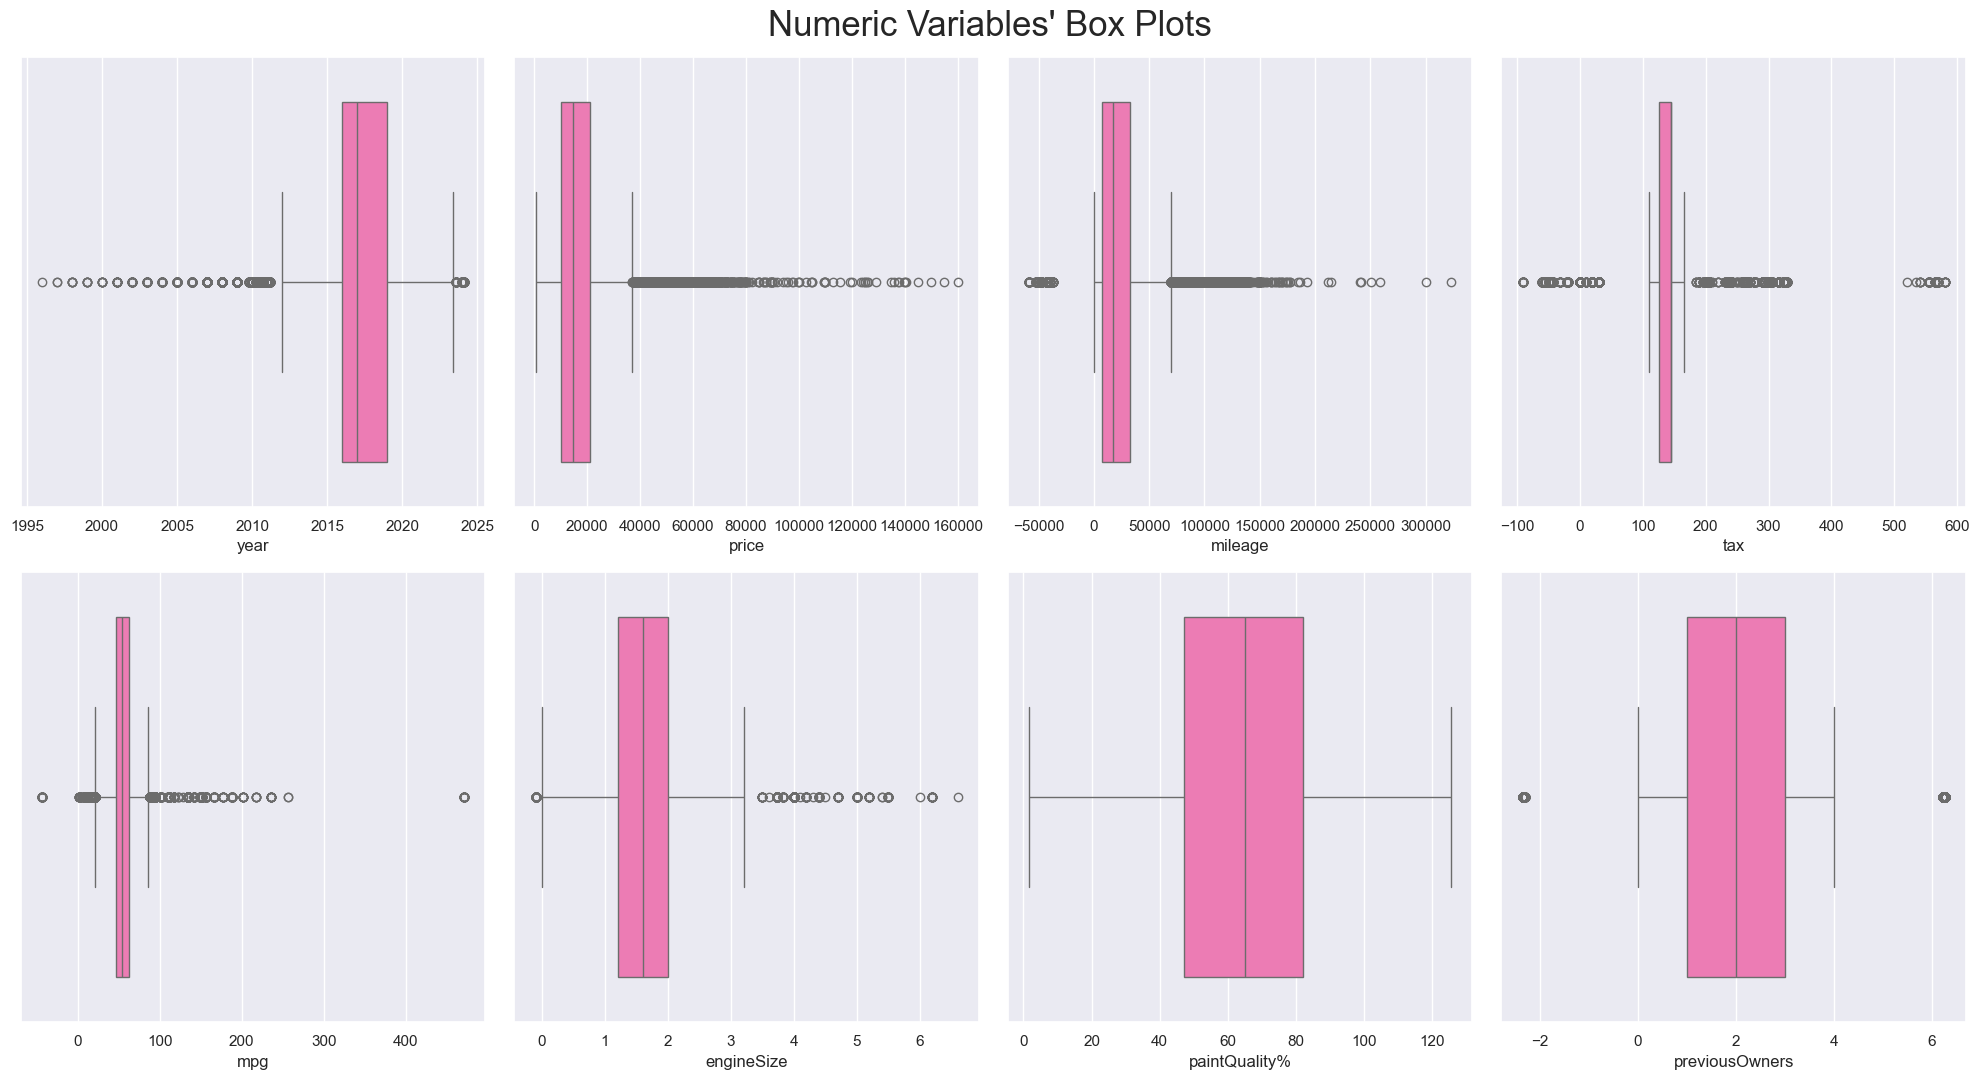

In [576]:
sns.set()

# We will put all the numeric variables' histograms in one figure
# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(2, ceil(len(numeric_features) / 2 ), figsize = (20, 11))

for ax, feat in zip(axes.flatten(), numeric_features):
    sns.boxplot(x=df_train[feat], ax=ax, color='hotpink')

# Add a centered title to the figure:
plt.suptitle("Numeric Variables' Box Plots", fontsize=25)

plt.tight_layout()
plt.show()

In [577]:
df_train_copy=df_train.copy()
df_train_copy["carID"] = df_train_copy.index

In [578]:
# # Obtain correlation matrix. 
# Round to 2 decimal places

numeric_with_carID=list(set(numeric_features).union(['carID']))
corr = df_train_copy[numeric_with_carID].corr(method="spearman")

corr = corr.round(2)
corr

price  engineSize   mpg  mileage  carID  previousOwners  \
price            1.00        0.56 -0.39    -0.51  -0.21           -0.00   
engineSize       0.56        1.00 -0.20     0.10  -0.18            0.00   
mpg             -0.39       -0.20  1.00     0.32  -0.01            0.00   
mileage         -0.51        0.10  0.32     1.00  -0.02            0.00   
carID           -0.21       -0.18 -0.01    -0.02   1.00           -0.00   
previousOwners  -0.00        0.00  0.00     0.00  -0.00            1.00   
paintQuality%    0.00        0.00  0.00    -0.00  -0.01           -0.01   
tax              0.31        0.16 -0.55    -0.26  -0.04           -0.00   
year             0.60       -0.04 -0.31    -0.78   0.01            0.00   

                paintQuality%   tax  year  
price                    0.00  0.31  0.60  
engineSize               0.00  0.16 -0.04  
mpg                      0.00 -0.55 -0.31  
mileage                 -0.00 -0.26 -0.78  
carID                   -0.01 -0.04  0.01  
previousOwners          -0.01 -0.00  0.00  
paintQuality%            1.00  0.00  0.00  
tax                      0.00  1.00  0.32  
year                     0.00  0.32  1.00

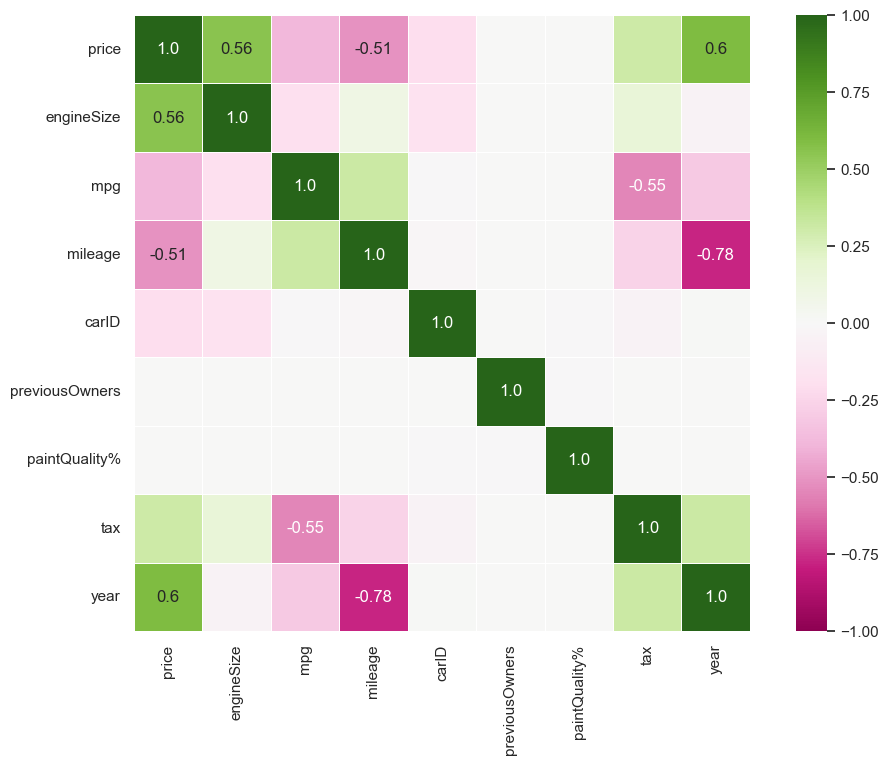

In [579]:
df_train

# Prepare figure
fig = plt.figure(figsize=(12, 8))

# percebr melhor o que está a acontecer aqui
mask_annot = np.absolute(corr.values) >= 0.5 
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) 


# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, 
            annot=annot, # Specify custom annotation
            fmt='s', # The annotation matrix now has strings, so we need to explicitly say this
            vmin=-1, vmax=1, 
            center=0, # Center the colormap at zero
            square=True, # Make each cell square-shaped
            linewidths=.5, # Add lines between cells
            cmap='PiYG' # Diverging color map
            )

# ## Once you are happy, save this as an image
# # plt.savefig(os.path.join('..', 'figures', 'eda', 'correlation_matrix.png'), dpi=200)

plt.show()

# ## How can we improve this figure?

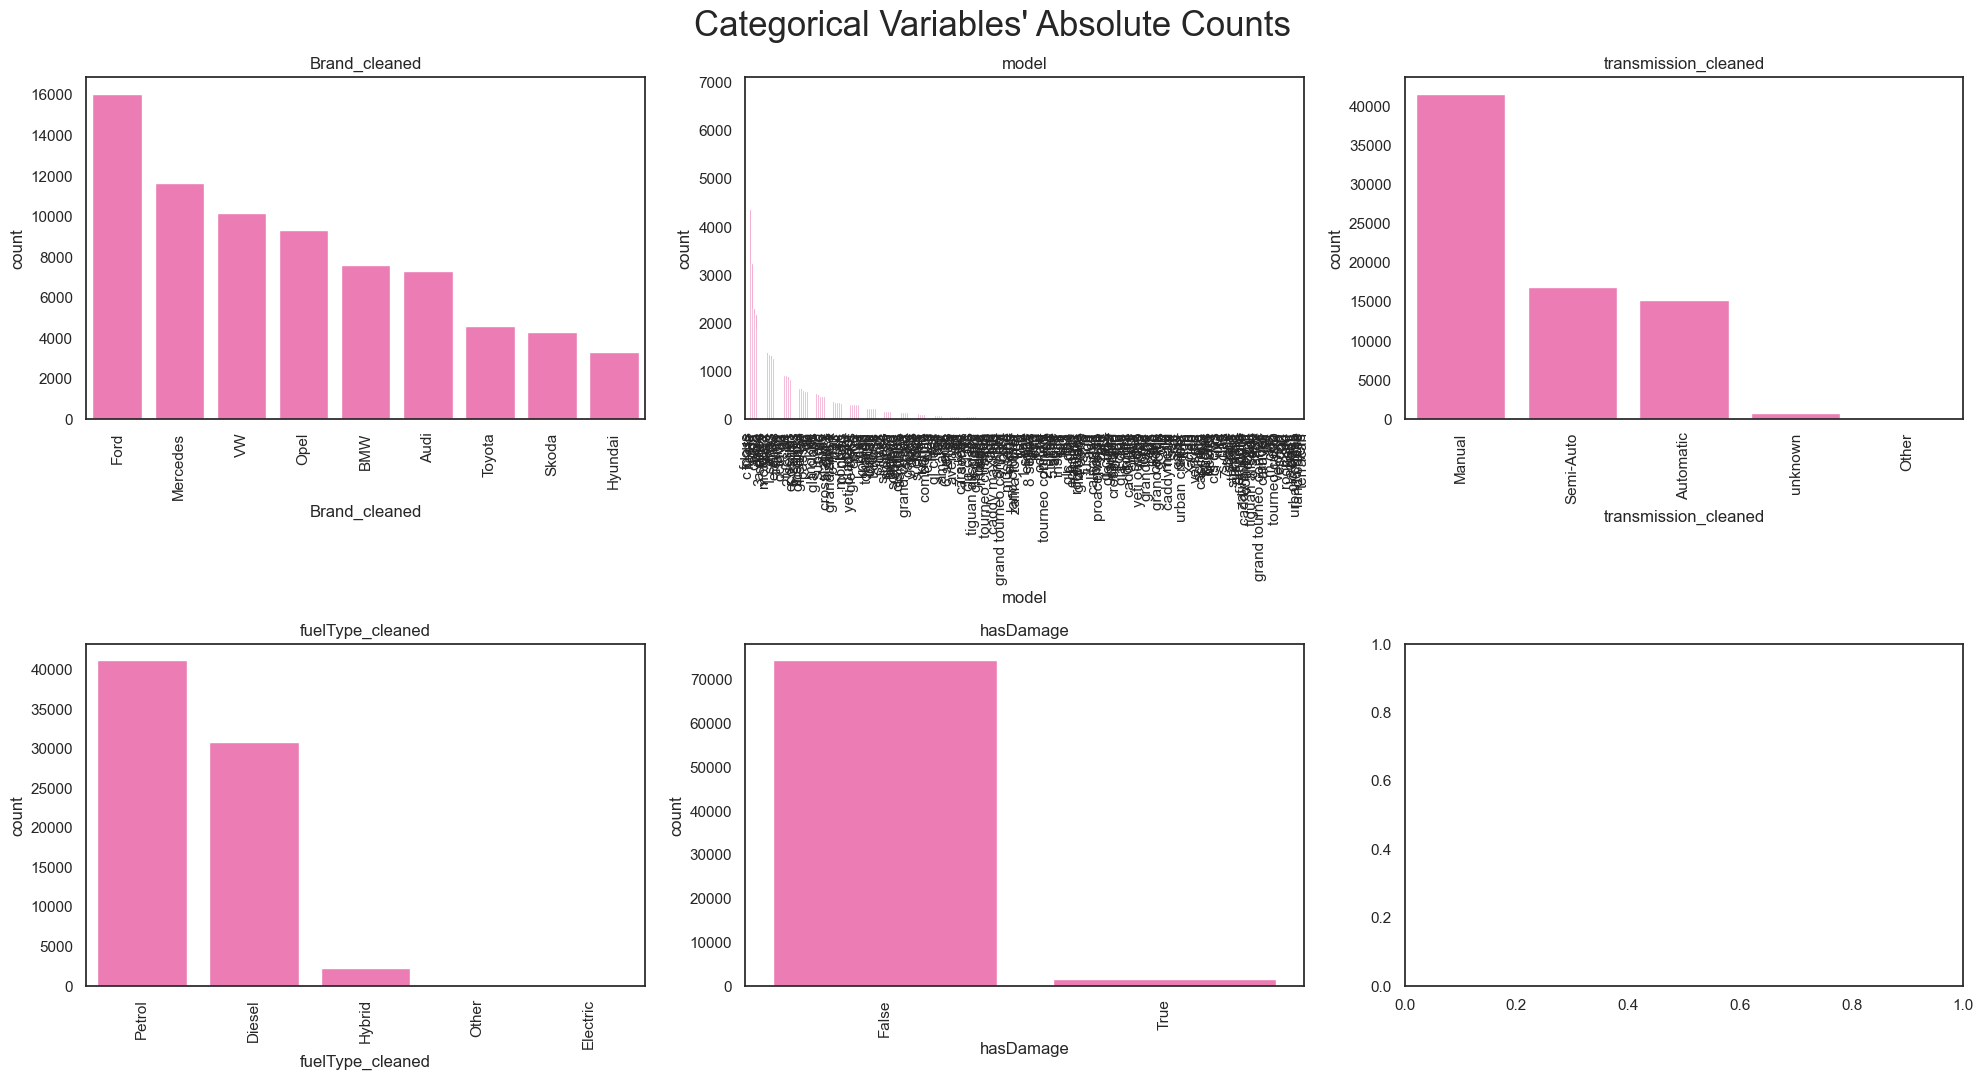

In [582]:
sns.set(style="white")

fig, axes = plt.subplots(
    2, 
    ceil(len(categorical_features) / 2), 
    figsize=(20, 11)
    )

for ax, feat in zip(axes.flatten(), categorical_features):
    sns.countplot(x=df_train[feat], ax=ax, 
                  order=df_train[feat].value_counts().index, color = 'hotpink') 
    ax.set_title(feat)
    ax.tick_params(axis='x', rotation=90)  # roda os labels no eixo x


plt.suptitle("Categorical Variables' Absolute Counts", fontsize=25)

plt.tight_layout()
plt.show()

## NaN's

<div class="alert alert-block alert-info">
    
We can only correct the data types after dealing with the NaN's. 


</div>

In [567]:
df_train.isna().sum()

Brand                   1521
model                   1517
year                    1491
price                      0
transmission            1522
mileage                 1463
fuelType                1510
tax                     7904
mpg                     7926
engineSize              1515
paintQuality%           1524
previousOwners          1550
hasDamage                  0
Brand_cleaned           1521
model_cleaned           1517
fuelType_cleaned        1510
transmission_cleaned    1522
dtype: int64

In [568]:
df_test.isna().sum()

Brand                    649
model                    650
year                     653
transmission             623
mileage                  689
fuelType                 656
tax                     3308
mpg                     3288
engineSize               628
paintQuality%            625
previousOwners           597
hasDamage                  0
Brand_cleaned            649
Model_cleaned            650
fuelType_cleaned         656
transmission_cleaned     623
model_cleaned            650
dtype: int64

#### Filling in NaN's for Categorical Variables

Categorical: Brand_cleaned, model_cleaned, transmission_cleaned, fuelType_cleaned

#### Filling in NaN's for Numeric Variables


<div class="alert alert-block alert-info">

Not finished

</div>